# Advanced Regression - Surprise Housing
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 
The company wants to know:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

Also, determine the optimal value of lambda for ridge and lasso regression.
Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Assessment Methodology
- Loading and Understanding the data
- Data Cleaning
- Exploratory Data Analysis
- Model Building
- Summary & Key findings


## 1. Loading and Understanding the data
- In this stage visually reviewing the data , correlating with its metadata available against the columns , identifying the tools can be used for this excercise

In [1024]:
#Importing all the necessary modules which helps in analysing the data using Python 
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Data processing and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, timedelta, date, time

# Data Modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### For Regularization
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Version of libraries used in this project
#numpy - 1.24.1
#pandas - 1.3.4
#matplotlib.pyplot - 3.5.2
#seaborn - 0.12.2
#statmodels - 0.13.5
#sklearn - 0.0.post1

In [1025]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [1026]:
# Loading the data
Housing_Data = pd.read_csv("train.csv")
Housing_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1027]:
# Looking for the data set shape.
Housing_Data.shape

(1460, 81)

Observation - It has 1460 rows and 81 columns . Column heading metadata provided as per the data set

In [1028]:
# Looking for the attributes types. Majority of them as interger and some are floats
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1029]:
# Looking for the data distribution pattern . Mainly this helps to under stand the dataspread.
# In most of the metrics Mean and Median are almost close
Housing_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1030]:
# Listing the columns values in order to match it with metadata
Housing_Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1031]:
# Looking for any missing values in the columns
Housing_Data.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [1032]:
#Listing the null percentages of all the columns
round(Housing_Data.isnull().sum()/len(Housing_Data.index)*100,2).sort_values(ascending=False) 

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

Observations - There are 19 columns with null values , out of which 6 columns having above 47% null values

In [1033]:
missing_cols_prcnt = round(Housing_Data.isnull().sum()/len(Housing_Data.index)*100,2)
pd.DataFrame(missing_cols_prcnt[missing_cols_prcnt!=0].sort_values(ascending=False)) 

,0
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55


# 2. Data Cleaning
- Looking for the null values and  its percentage 
- Methodology for removing those null values 
- Imputing those null values based on the available and buisiness probelems
- Formating the column datatypes based on the data and its meaning

In [1034]:
#NA in Alley column means No Alley, so we will replace NA by it.
Housing_Data['Alley'].fillna('No Alley', inplace=True)

In [1035]:
Housing_Data['MasVnrType'].fillna('None', inplace=True) 

In [1036]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
Housing_Data['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [1037]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
Housing_Data['PoolQC'].fillna('No Pool', inplace=True) 

In [1038]:
#NA in Fence column means No Fence, so we will replace NA by it.
Housing_Data['Fence'].fillna('No Fence', inplace=True) 

In [1039]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.
Housing_Data['GarageType'].fillna('No Garage', inplace=True) 
Housing_Data['GarageFinish'].fillna('No Garage', inplace=True) 
Housing_Data['GarageQual'].fillna('No Garage', inplace=True) 
Housing_Data['GarageCond'].fillna('No Garage', inplace=True) 

In [1040]:
Housing_Data['MiscFeature'].fillna('None', inplace=True) 

In [1041]:
missing_cols_prcnt = round(Housing_Data.isna().sum()/len(Housing_Data.index)*100,2)
pd.DataFrame(missing_cols_prcnt[missing_cols_prcnt!=0].sort_values(ascending=False)) 

,0
LotFrontage,17.74
GarageYrBlt,5.55
BsmtExposure,2.60
BsmtFinType2,2.60
BsmtQual,2.53
BsmtCond,2.53
BsmtFinType1,2.53
MasVnrArea,0.55
Electrical,0.07


Obervations - Now only 9 columns having missing values, rest are addressed based on the metadata

In [1042]:
Housing_Data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1043]:
## Replacing missing values in the above meniioned two columns by their means
Housing_Data['LotFrontage'].fillna(round(Housing_Data['LotFrontage'].mean(),2), inplace=True)
Housing_Data['MasVnrArea'].fillna(round(Housing_Data['MasVnrArea'].mean(),2), inplace=True)

In [1044]:
Housing_Data['GarageYrBlt'].fillna(value='0', inplace=True)
Housing_Data['BsmtExposure'].fillna(value='Not_available', inplace=True)
Housing_Data['BsmtFinType2'].fillna(value='Not_available', inplace=True)
Housing_Data['BsmtQual'].fillna(value='Not_available', inplace=True)
Housing_Data['BsmtCond'].fillna(value='Not_available', inplace=True)
Housing_Data['BsmtFinType1'].fillna(value='Not_available', inplace=True)
Housing_Data['Electrical'].fillna(value='Not_available', inplace=True)

In [1045]:
missing_cols_value = Housing_Data.isna().sum()
pd.DataFrame(missing_cols_value[missing_cols_value!=0].sort_values(ascending=False)) 

,0


Obervations -- All the missing values are addressed using its metadata values , or mean values

### 3. Exploratory Data Analysis

In [1046]:
#converting year to number of years
Housing_Data['YearBuilt'] = 2019 - Housing_Data['YearBuilt']
Housing_Data['YearRemodAdd'] = 2019 - Housing_Data['YearRemodAdd']
Housing_Data['GarageYrBlt'] = Housing_Data['GarageYrBlt'].apply(lambda x: int(x))
Housing_Data['GarageYrBlt'] = 2019 - Housing_Data['GarageYrBlt']
Housing_Data['YrSold'] = 2019 - Housing_Data['YrSold']

In [1047]:
# Separating the Numerical and Categorical features for analysis
numeric_df = Housing_Data.select_dtypes(include=['int64', 'float64'])
categorical_df = Housing_Data.select_dtypes(include=['object'])

In [1048]:
numeric_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,0.012713,0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,-0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,-0.027850,-0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,-0.117598,-0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,-0.100259,0.269729,0.323663,0.077106,0.137455,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,-0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,-0.014228,-0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,-0.572323,-0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,-0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,0.375983,-0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.043950,-0.077856
YearBuilt,0.012713,-0.027850,-0.117598,-0.014228,-0.572323,0.375983,1.000000,0.592855,-0.314745,-0.249503,0.049107,-0.149040,-0.391452,-0.281986,-0.010308,0.183784,-0.199010,-0.187599,0.038162,-0.468271,-0.242656,0.070651,0.174800,-0.095589,-0.147716,0.272029,-0.537850,-0.478954,-0.224880,-0.188686,0.387268,-0.031355,0.050364,-0.004950,0.034383,-0.012398,-0.013618,-0.522897
YearRemodAdd,0.021998,-0.040581,-0.082746,-0.013788,-0.550684,-0.073741,0.592855,1.000000,-0.179187,-0.128451,0.067759,-0.181133,-0.291066,-0.240379,-0.140024,0.062419,-0.287389,-0.119470,0.012337,-0.439046,-0.183331,0.040581,0.149598,-0.191740,-0.112581,0.146357,-0.420622,-0.371600,-0.205726,-0.226298,0.193919,-0.045286,0.038740,-0.005829,0.010286,-0.021490,0.035743,-0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,-0.314745,-0.179187,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,-0.133734,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,-0.249503,-0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,-0.115843,0.224054,0.

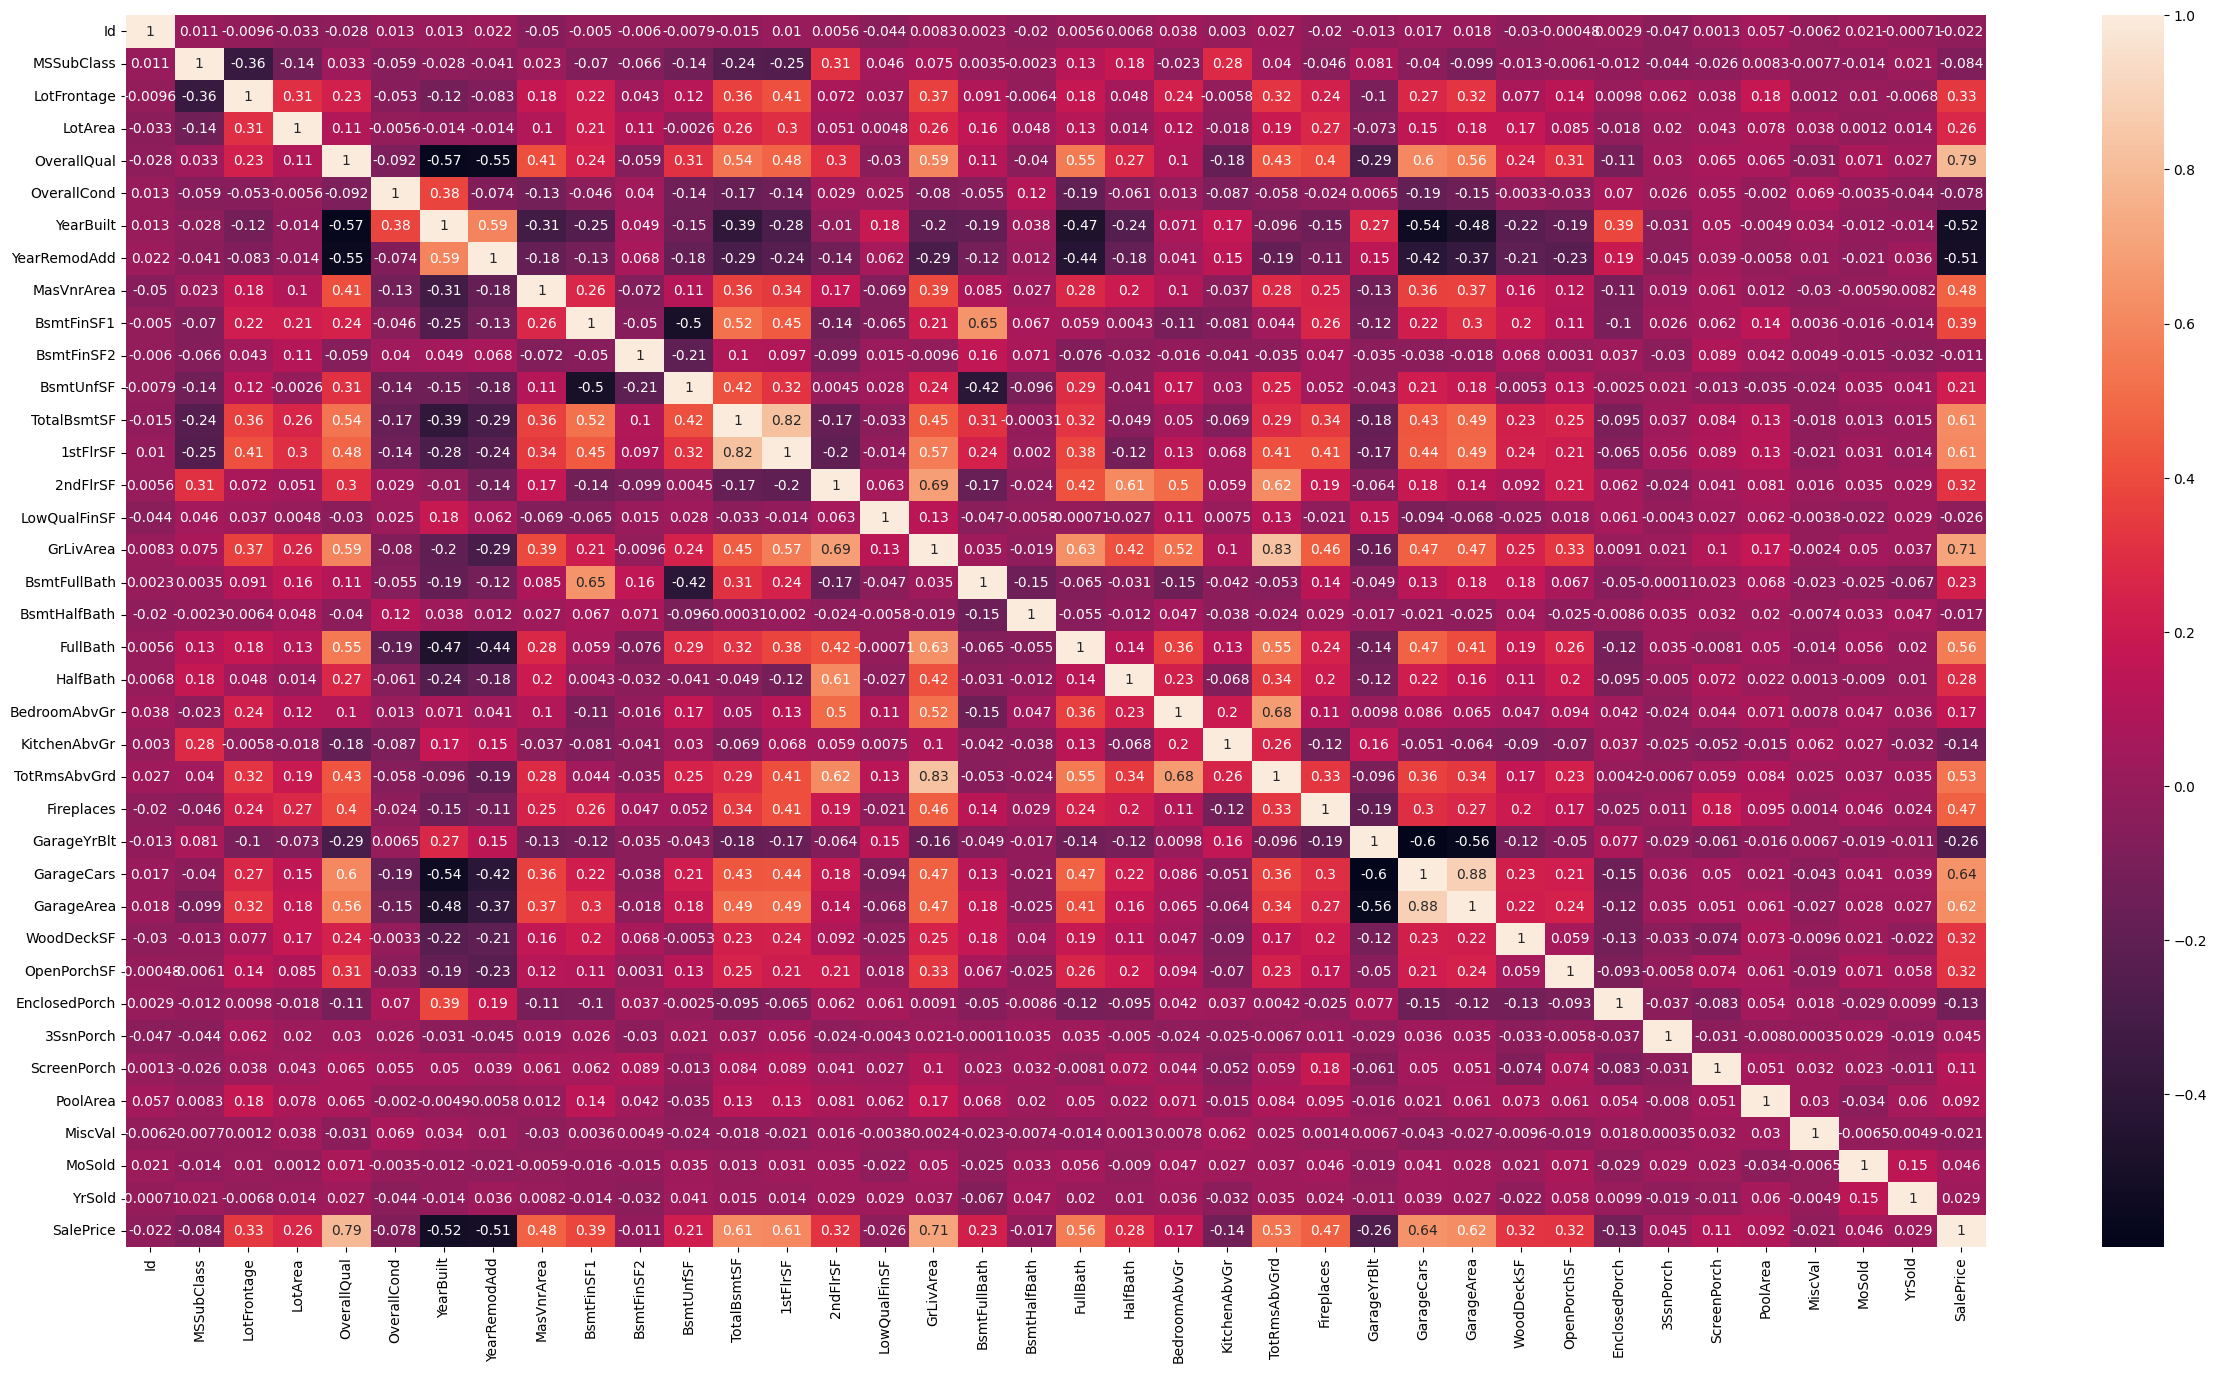

In [1049]:
plt.figure(figsize=(30,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

#### Univariate and Bivariate Analysis - Numerical Features

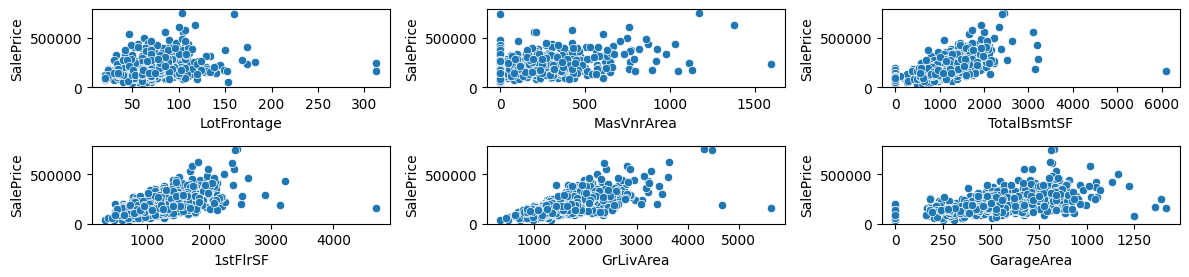

In [1050]:
# Plotting the scatter plot of each variable against Sale Price based on the positive higher correlation
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['LotFrontage', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'GarageArea']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Observation - LotFrontage,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea showing positive correlation with Sale Price

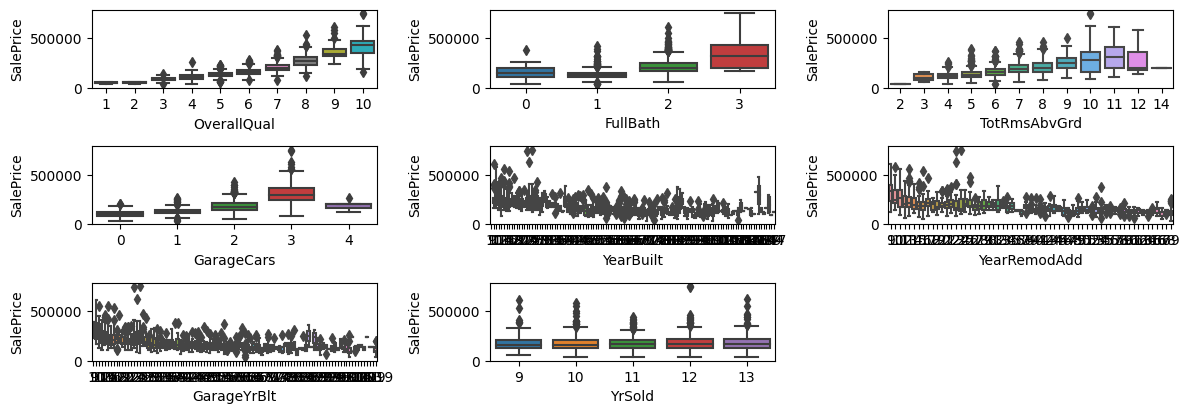

In [1051]:
# Plotting the box plot of each variable against Sale Price  - Ordered catogorical variables

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','FullBath', 'TotRmsAbvGrd', 'GarageCars','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Obervation
- Overall quality is highly correlated with Sale Price
- There are outliers visible in each variables ,need to address them seperatly

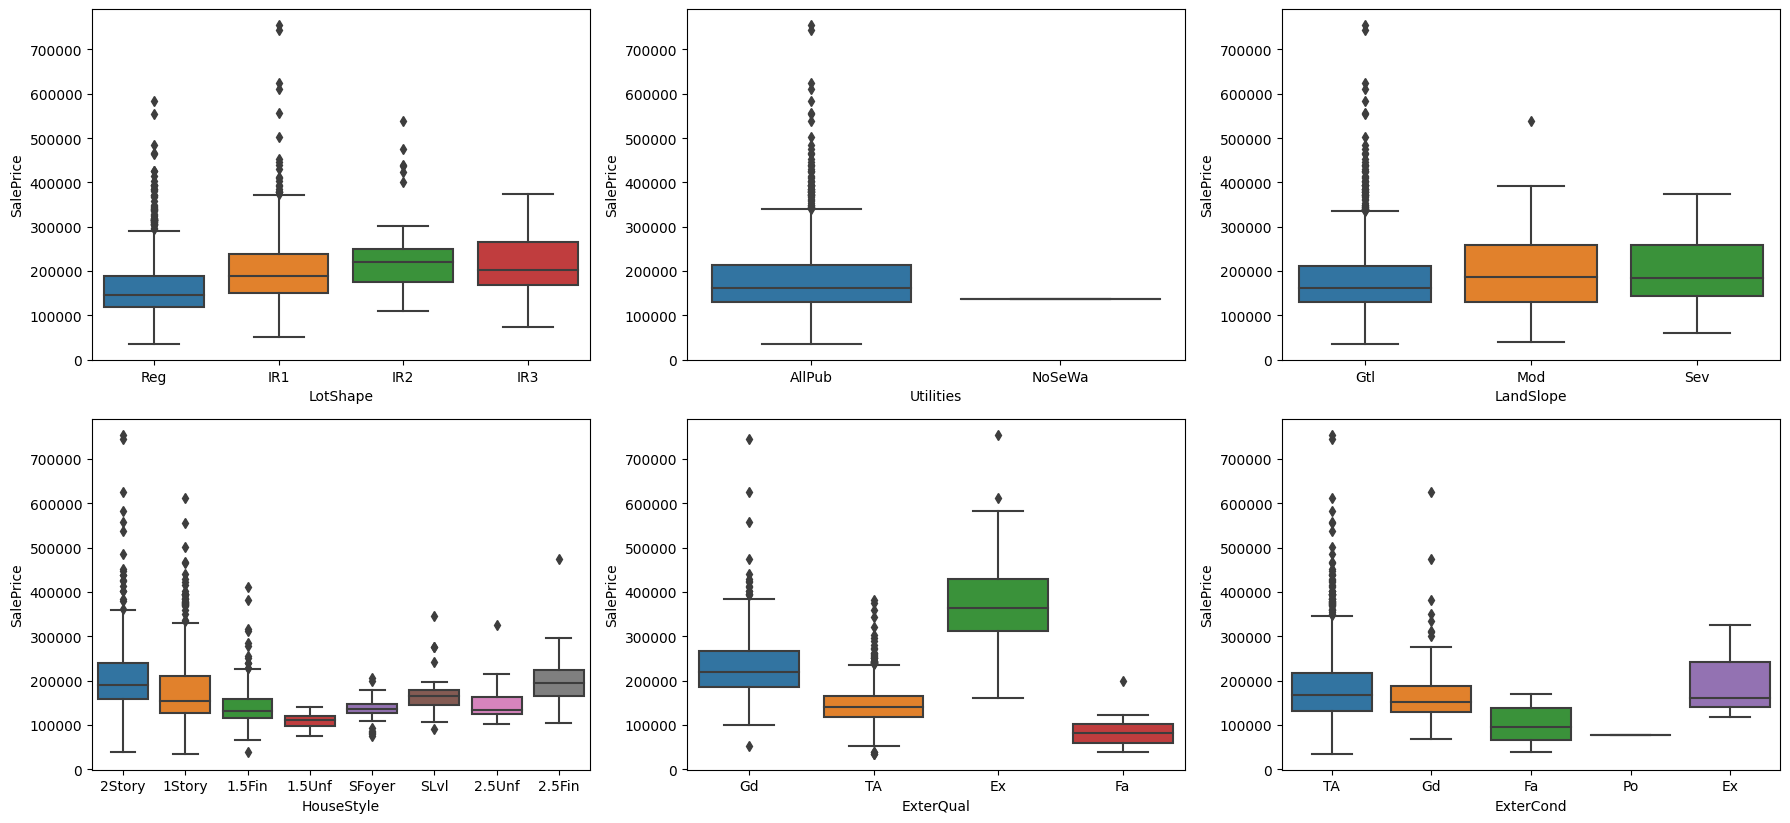

In [1052]:
fig=plt.subplots(figsize=(18, 12))

for i, feature in enumerate(['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Obervation
- Exterial quality is highly correlated with Sale Price and Excellent Quality having higher sale price
- There are outliers visible in each variables ,need to address them seperatly

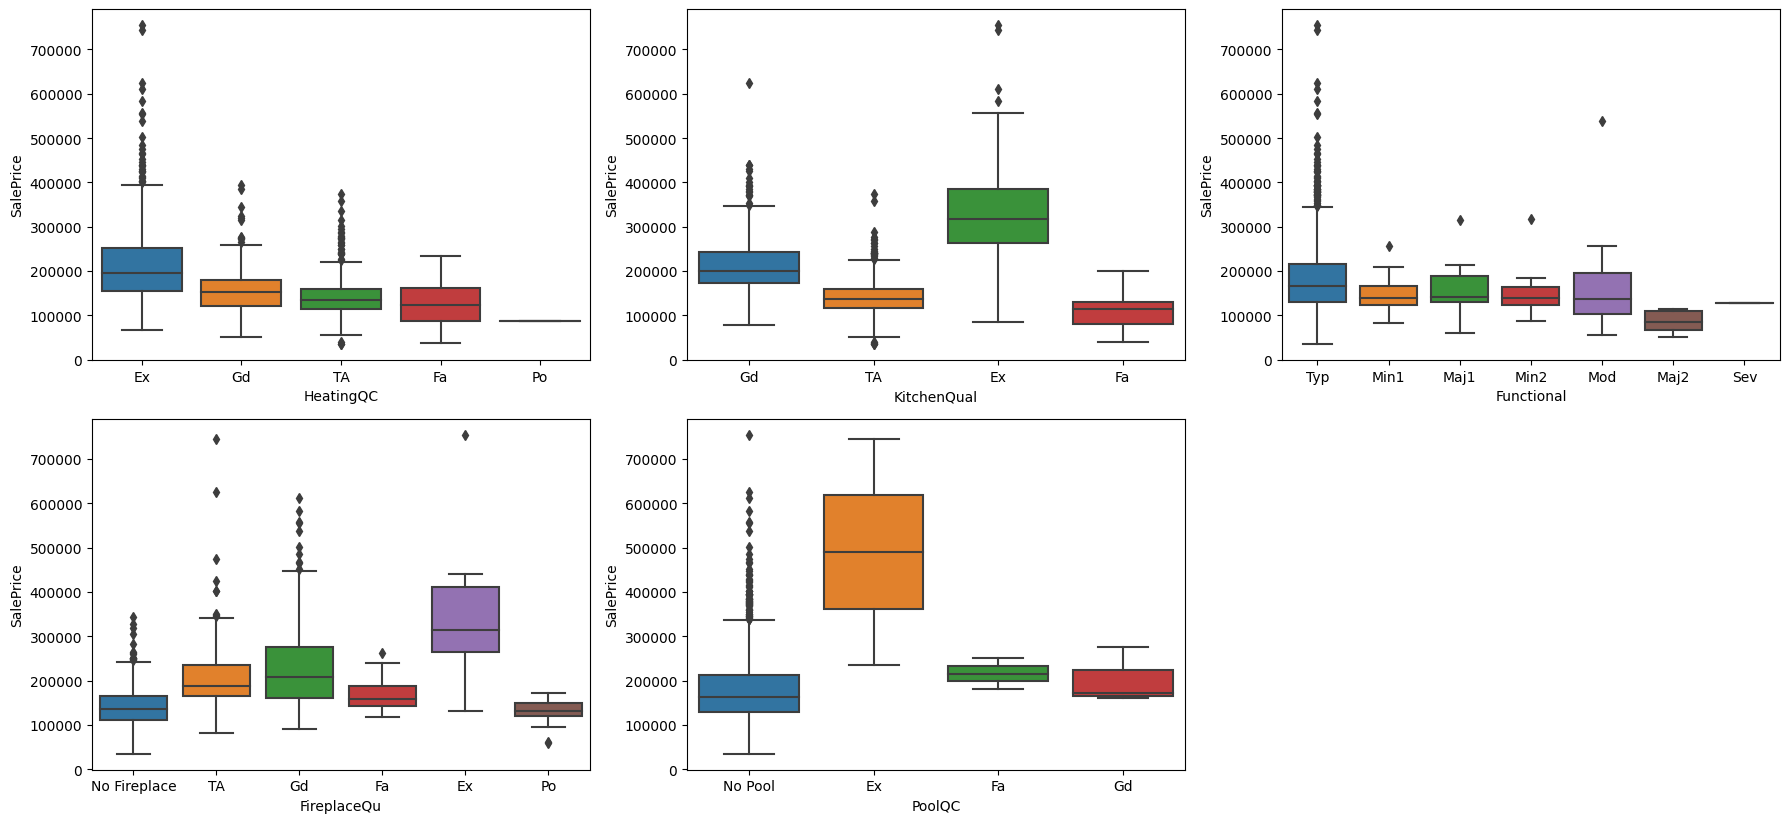

In [1053]:
fig=plt.subplots(figsize=(18, 12))

for i, feature in enumerate(['HeatingQC', 'KitchenQual','Functional','FireplaceQu','PoolQC']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Obervation
- Having FirePlace and Pool positively affecting the saleprice
- There are outliers visible in each variables ,need to address them seperatly

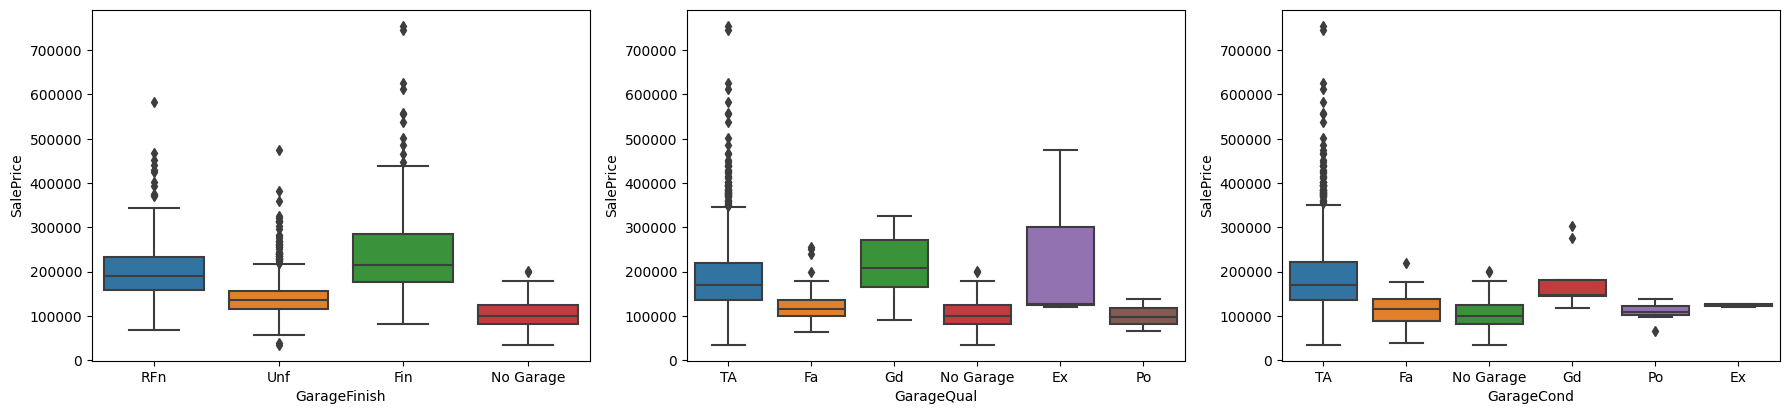

In [1054]:
fig=plt.subplots(figsize=(18, 12))

for i, feature in enumerate(['GarageFinish', 'GarageQual','GarageCond']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Obervation
- Having Garage affecting the saleprice
- There are outliers visible in each variables ,need to address them seperatly

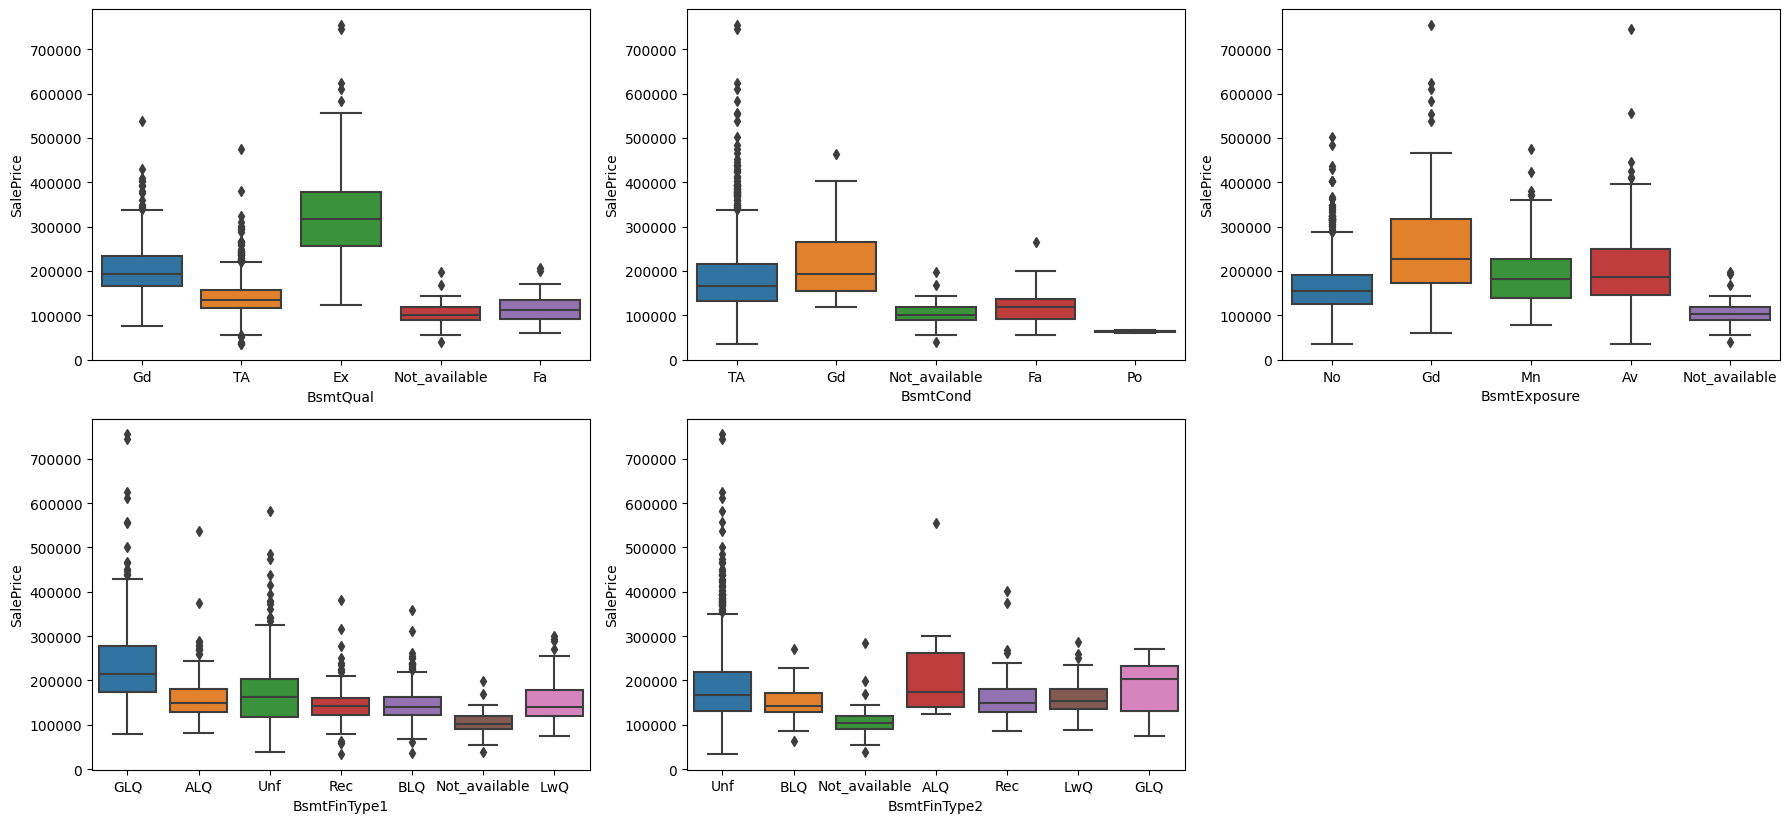

In [1055]:
fig=plt.subplots(figsize=(18, 12))

for i, feature in enumerate(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Obervation
- Basement Quality,Basement Exposure positively affecting the saleprice
- There are outliers visible in each variables ,need to address them seperatly

#### Encoding Categorical Features 

In [1056]:
# Catogorical features are mapping to numerical numbers for the model building
Housing_Data['LotShape'] = Housing_Data['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
Housing_Data['Utilities'] = Housing_Data['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
Housing_Data['LandSlope'] = Housing_Data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
Housing_Data['HouseStyle'] = Housing_Data['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
Housing_Data['ExterQual'] = Housing_Data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing_Data['ExterCond'] = Housing_Data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing_Data['BsmtQual'] = Housing_Data['BsmtQual'].map({'Not_available':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing_Data['BsmtCond'] = Housing_Data['BsmtCond'].map({'Not_available':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing_Data['BsmtExposure'] = Housing_Data['BsmtExposure'].map({'Not_available':0,'No':1,'Mn':2,'Av':3,'Gd':4})
Housing_Data['BsmtFinType1'] = Housing_Data['BsmtFinType1'].map({'Not_available':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Housing_Data['BsmtFinType2'] = Housing_Data['BsmtFinType2'].map({'Not_available':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Housing_Data['HeatingQC'] = Housing_Data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing_Data['CentralAir'] = Housing_Data['CentralAir'].map({'N':0,'Y':1})
Housing_Data['KitchenQual'] = Housing_Data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing_Data['GarageFinish'] = Housing_Data['GarageFinish'].map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
Housing_Data['GarageQual'] = Housing_Data['GarageQual'].map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing_Data['GarageCond'] = Housing_Data['GarageCond'].map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing_Data['Functional'] = Housing_Data['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
Housing_Data['FireplaceQu'] = Housing_Data['FireplaceQu'].map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing_Data['PoolQC'] = Housing_Data['PoolQC'].map({'No Pool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [1057]:
# Checking the features after encoding

Housing_Data[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1460 non-null   int64
 1   Utilities     1460 non-null   int64
 2   LandSlope     1460 non-null   int64
 3   HouseStyle    1460 non-null   int64
 4   ExterQual     1460 non-null   int64
 5   ExterCond     1460 non-null   int64
 6   BsmtQual      1460 non-null   int64
 7   BsmtCond      1460 non-null   int64
 8   BsmtExposure  1460 non-null   int64
 9   BsmtFinType1  1460 non-null   int64
 10  BsmtFinType2  1460 non-null   int64
 11  HeatingQC     1460 non-null   int64
 12  KitchenQual   1460 non-null   int64
 13  Functional    1460 non-null   int64
 14  FireplaceQu   1460 non-null   int64
 15  GarageFinish  1460 non-null   int64
 16  GarageQual    1460 non-null   int64
 17  GarageCond    1460 non-null   int64
dtypes: int64(18)
memory usage: 205.4 KB


Observation - All these columns types are integer , with no NA

#### Analyzing Unordered Featues

In [1058]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

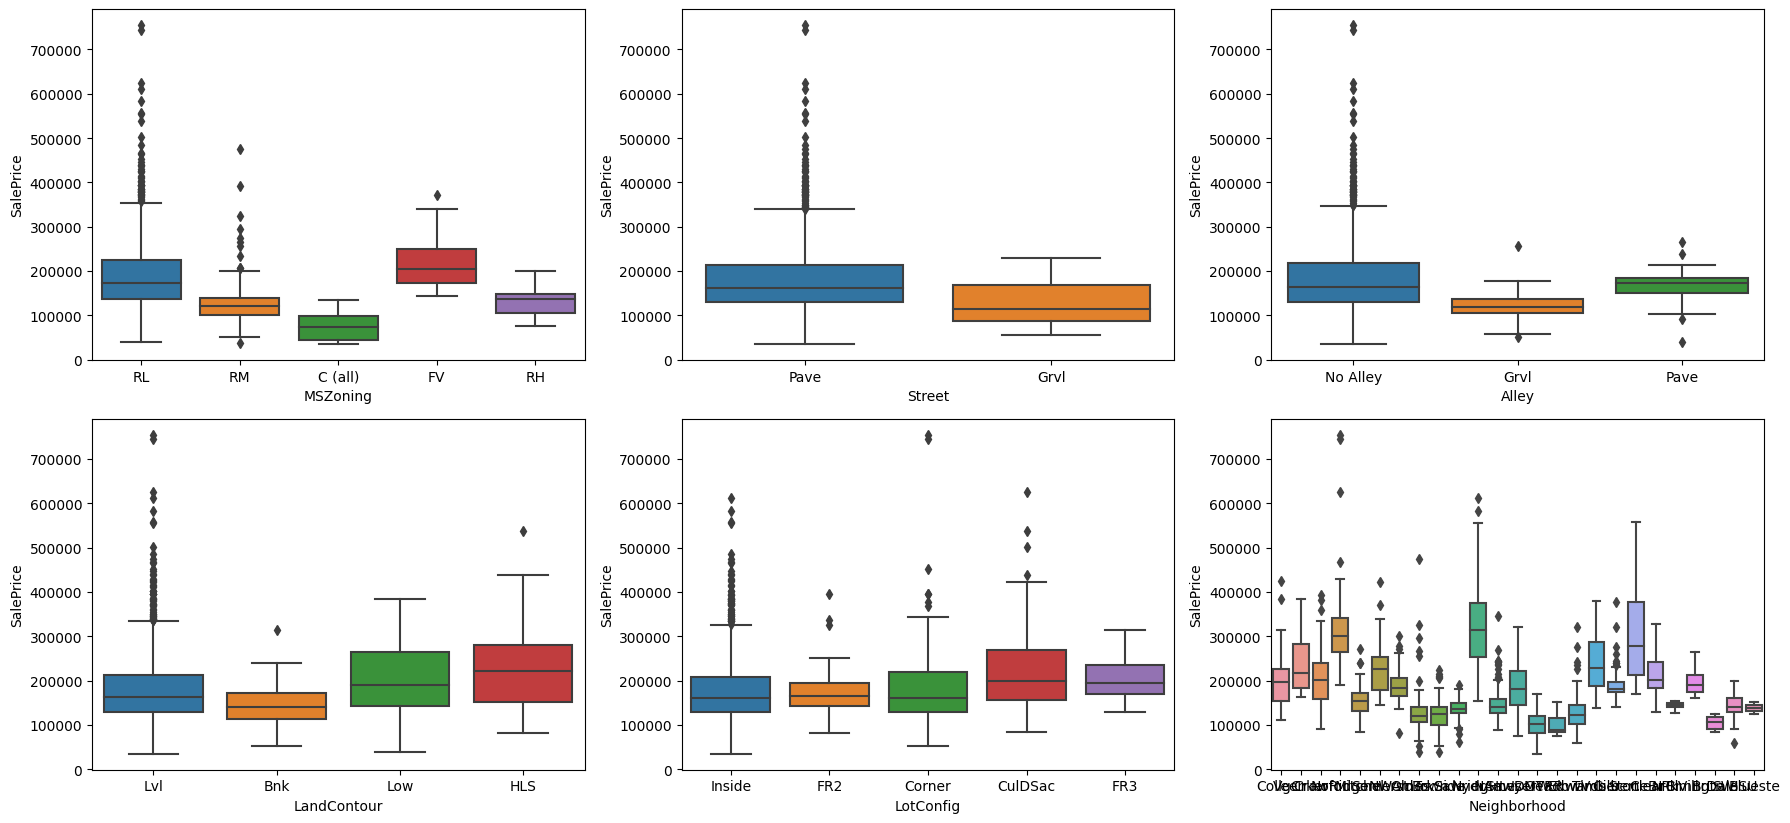

In [1059]:
fig=plt.subplots(figsize=(18, 12))
for i, feature in enumerate(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Observation 
- Majority of the houses doesnt have Alley
- Flatness of the property also affecting the house price

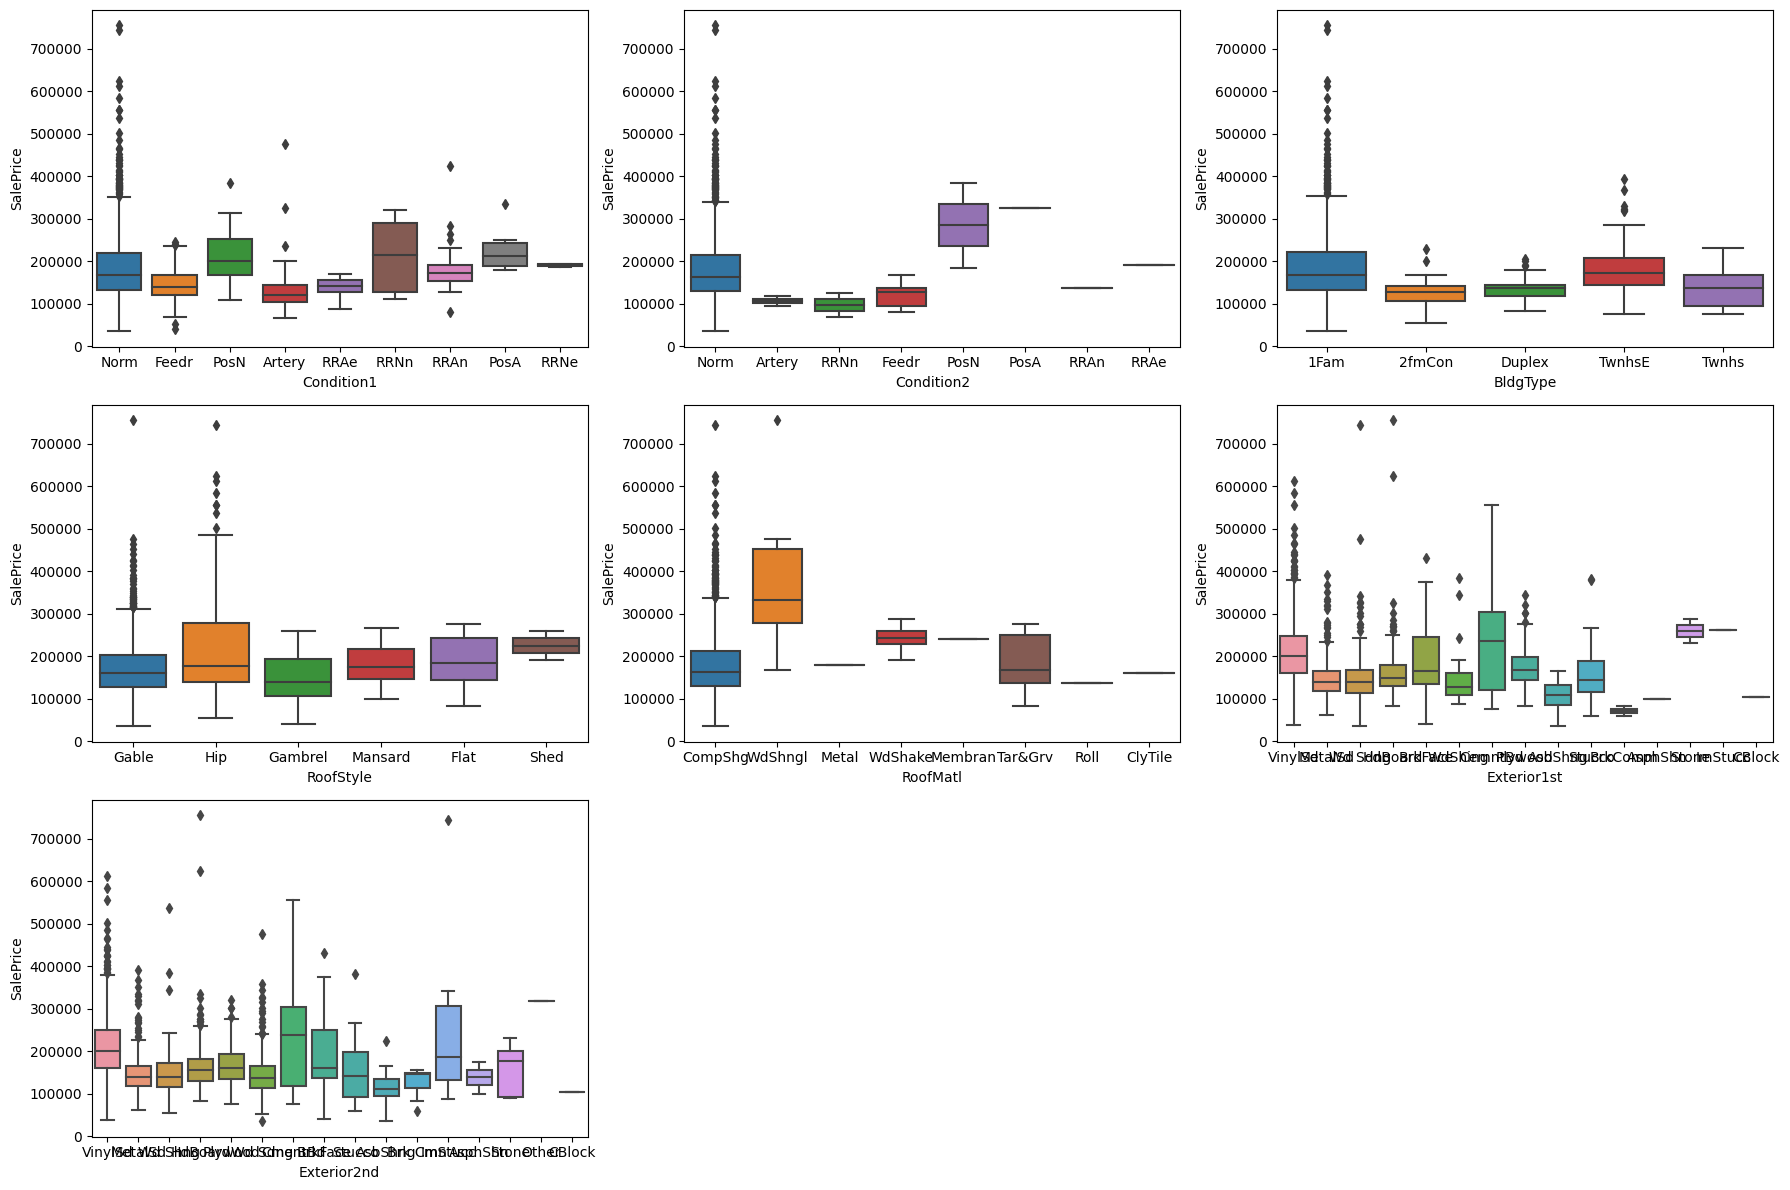

In [1060]:
fig=plt.subplots(figsize=(18, 12))
for i, feature in enumerate(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Observation 
- Majority of the houses doesnt have Alley
- Flatness of the property also affecting the house price

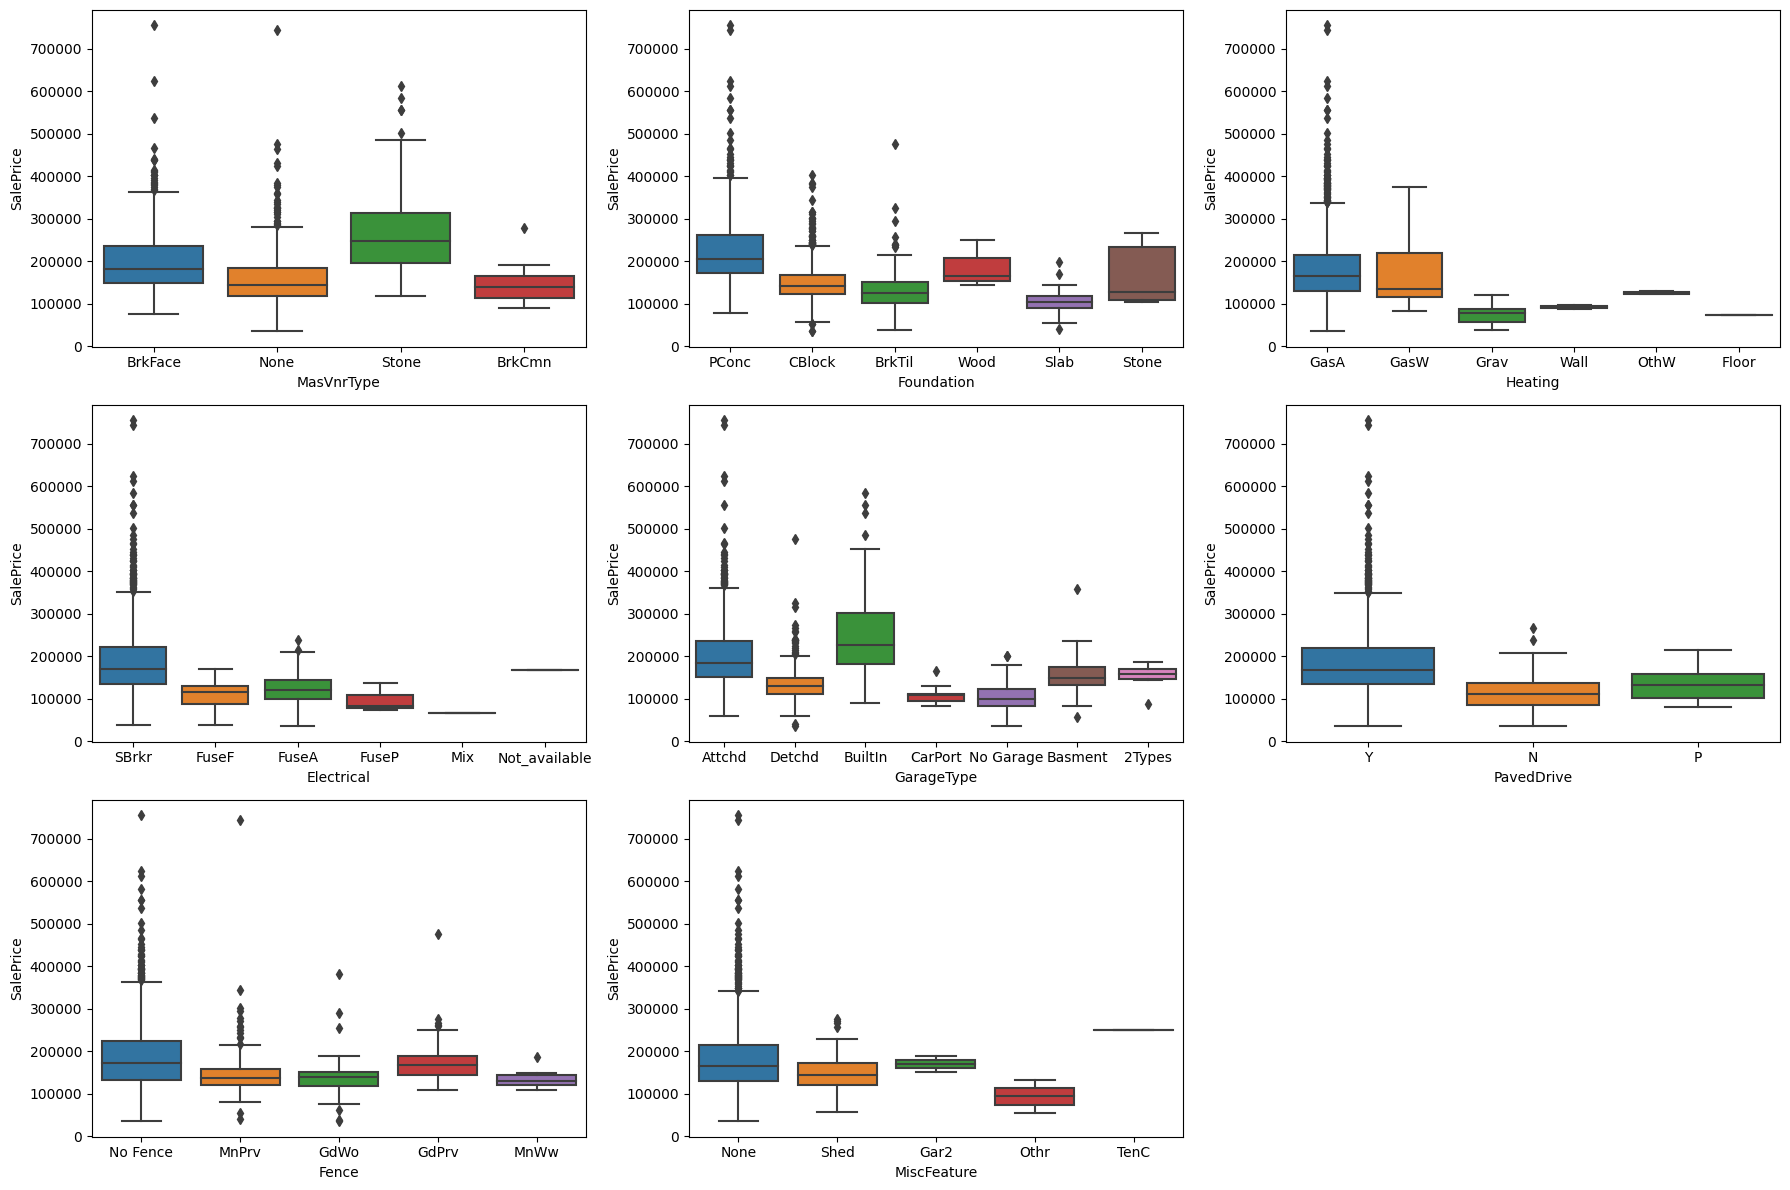

In [1061]:
fig=plt.subplots(figsize=(18, 12))
for i, feature in enumerate(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Observation 
- Garagetype , electrical categorical variables are affecting the sale price
- Flatness of the property also affecting the house price

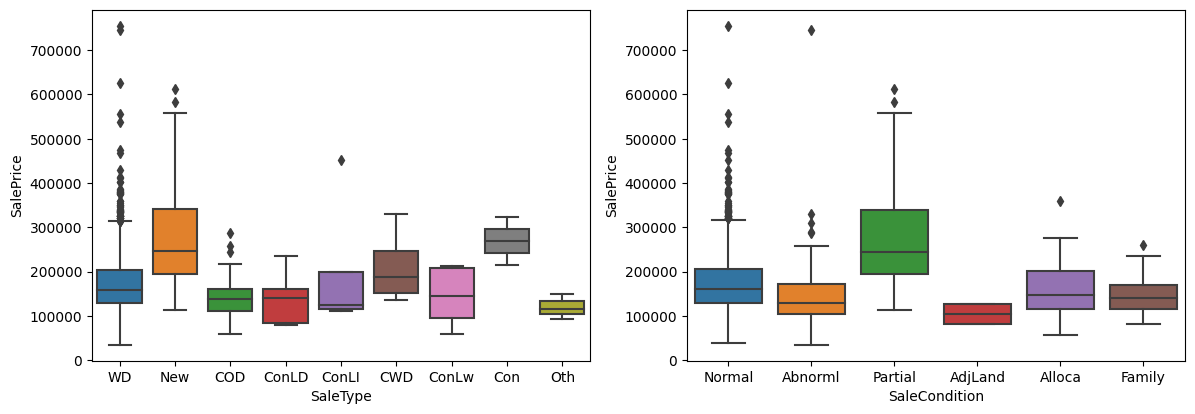

In [1062]:
fig=plt.subplots(figsize=(18, 12))
for i, feature in enumerate(['SaleType','SaleCondition']):
    plt.subplot(3,3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(x=Housing_Data[feature], y=Housing_Data['SalePrice'])
    plt.tight_layout()

Observation 
- SaleType , SaleCondition of the houses doesnt have Alley


#### Encoding Categorical Variables

In [1063]:
# Encoding categorical variables with dummy values
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2','BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']
dummy_df = pd.get_dummies(Housing_Data[unordered_features],dtype=int,drop_first=True)

In [1064]:
dummy_df.shape

(1460, 145)

In [1065]:
dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Not_available,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1066]:
# Adding the dummy variables to the original dataframe
Housing_Data = pd.concat([Housing_Data,dummy_df],axis=1)
#Dropping the redundant columns
Housing_Data = Housing_Data.drop(unordered_features,axis=1)

In [1067]:
Housing_Data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Not_available,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,3,3,0,3,7,5,16,16,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,0,16,2,2,548,3,3,0,61,0,0,0,0,0,0,2,11,208500,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,3,3,0,0,6,8,43,43,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,0,1,3,43,2,2,460,3,3,298,0,0,0,0,0,0,0,5,12,181500,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1

In [1068]:
Housing_Data.shape

(1460, 203)

Observation -There are total 203 columns in the data set

### Splitting into Train and Test Data

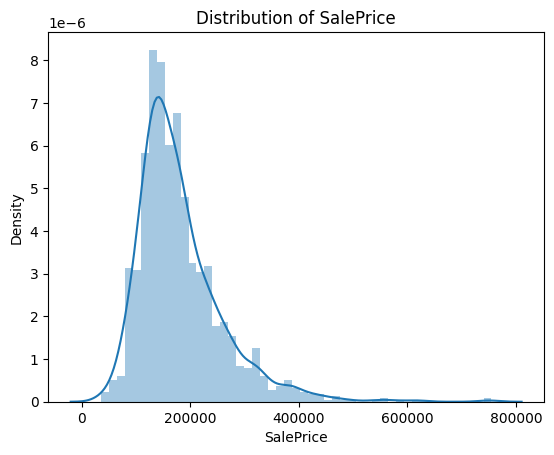

In [1069]:
# Checking the distribution of target variable, SalePrice
plt.title('Distribution of SalePrice')
sns.distplot(Housing_Data['SalePrice'])
plt.show()

Observation - Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

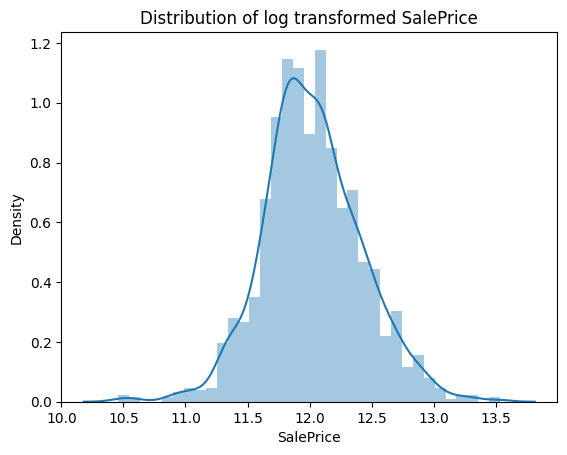

In [1070]:
sns.distplot(np.log(Housing_Data['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

Obervation - after the log transfermation , the sales price distribution seems to be normal

In [1071]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building
Housing_Data['SalePrice'] = np.log(Housing_Data['SalePrice'])

In [1072]:
# Splitting the data using train_test_split method form sklearn
df_train,df_test = train_test_split(Housing_Data,train_size=0.7,random_state=100)

In [1073]:
print(df_train.shape)
print(df_test.shape)


(1021, 203)
(439, 203)


In [1074]:
# Defining X_train and y_train - Predictor and response variables
# Setting up X and y Train and Test Data Sets
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop(["Id","SalePrice"],axis=1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop(["Id","SalePrice"],axis=1)

In [1075]:
# Printing the shape of Train and Test data
print("X Train : ", X_train.shape)
print("y Train : ", y_train.shape)
print("X Test : ", X_test.shape)
print("y Test : ", y_test.shape)

X Train :  (1021, 201)
y Train :  (1021,)
X Test :  (439, 201)
y Test :  (439,)


### Scaling the the Features


In [1076]:
# Get Numerical Features from X_train
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities',
       'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [1077]:
##   Scaling the numerical features using Standard Scalar
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## 3. Model Building and Evaluation

### Simple Linear Regression

In [1078]:
# Using LinearRegression method to fit the model based on the Train Data Set
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1079]:
#Build a linear model with all the features
#X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train).fit()
# show coefficients.
lr.params.head(15)

MSSubClass      0.001216
LotFrontage     0.001929
LotArea         0.001728
LotShape        0.000057
Utilities       0.000166
LandSlope       0.000461
HouseStyle     -0.000105
OverallQual     0.003300
OverallCond     0.004172
YearBuilt      -0.008536
YearRemodAdd    0.001034
MasVnrArea      0.000372
ExterQual       0.001134
ExterCond      -0.000391
BsmtQual       -0.000719
dtype: float64

In [1080]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.230e+05
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:25:59   Log-Likelihood:                          2857.6
No. Observations:                1021   AIC:                                     -5331.
Df Residuals:                     829   BIC:                                     -4385.
Df Model:                         192                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Observation :
- Model has an R Squared and Adjusted R-squared values seem to be pretty good

In [1081]:
X_train.shape

(1021, 201)

In [1082]:
X_test.shape

(439, 201)

Observation 
-  By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [1083]:
# Run Prediction for Train and Test
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [1084]:
# Check and Compare the R2 Squared, RSS and MSE values for Train and Test
metric = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print("Train - R2 Score : ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lr)
print("Test - R2 Score : ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lr))
print("Train - Residual Sum of Squares : ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lr))
print("Test - Residual Sum of Squares : ", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print("Train - Mean Squared Error : ", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print("Test - Mean Squared Error : ", mse_test_lr)
metric.append(mse_test_lr**0.5)

Train - R2 Score :  0.7999582291452897
Test - R2 Score :  -3.6977327966111684
Train - Residual Sum of Squares :  0.2215842289413387
Test - Residual Sum of Squares :  2.3573809323474455
Train - Mean Squared Error :  0.00021702666889455307
Test - Mean Squared Error :  0.005369888228581881


### Residual analysis against Linear Regression

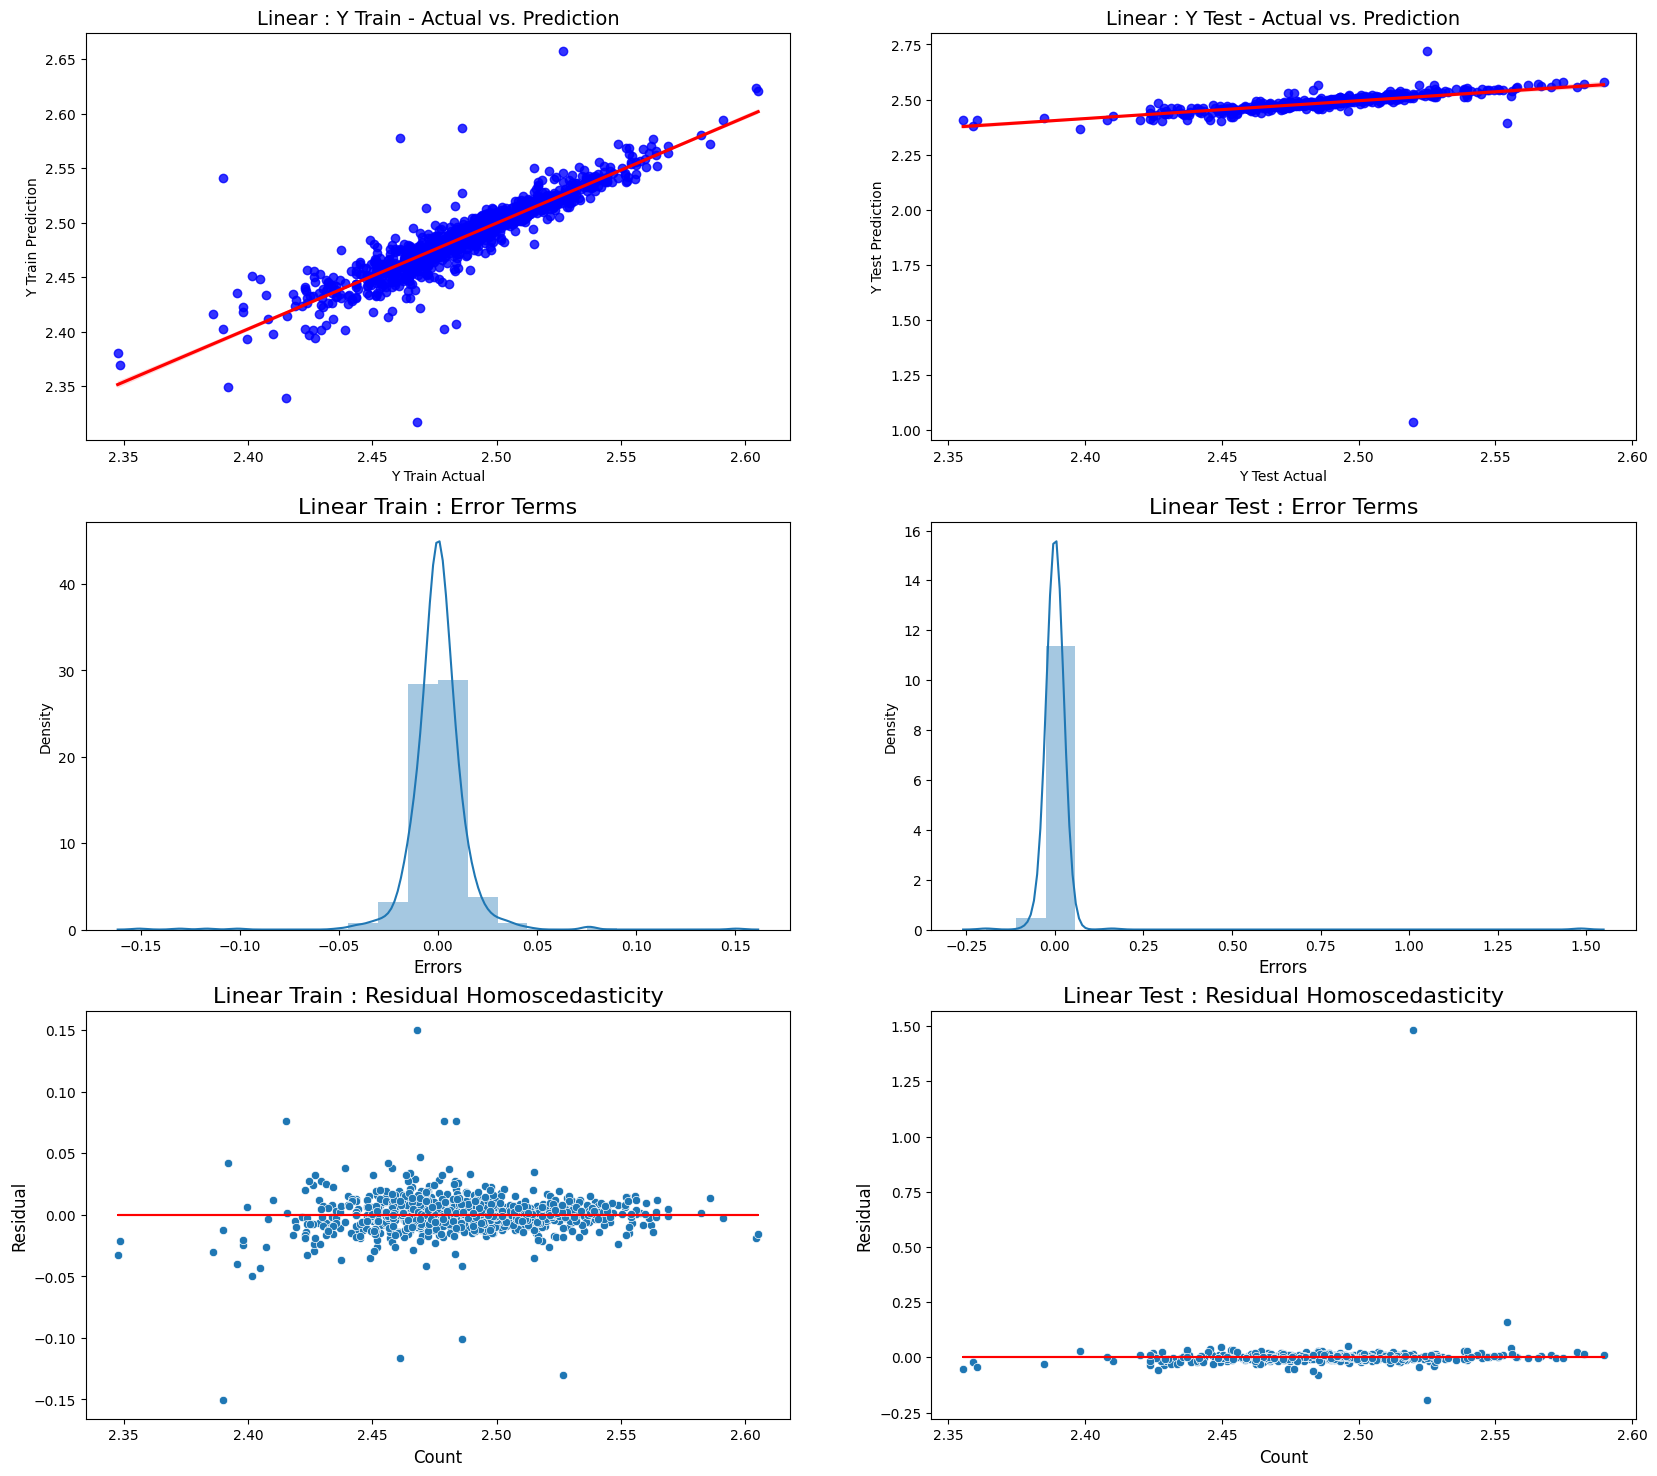

In [1085]:
# Linear - y-Predicted vs. y-Actual Values plot
#plt.subplots(figsize=(19,4))
plt.subplots(figsize=(20,18))
plt.subplot(3,2,1)
sns.regplot(x=y_train, y=y_pred_train_lr, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Linear : Y Train - Actual vs. Prediction', fontsize=14)
plt.xlabel('Y Train Actual', fontsize=10)
plt.ylabel('Y Train Prediction', fontsize=10)

plt.subplot(3,2,2)
sns.regplot(x=y_test, y=y_pred_test_lr, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Linear : Y Test - Actual vs. Prediction', fontsize=14)
plt.xlabel('Y Test Actual', fontsize=10)
plt.ylabel('Y Test Prediction', fontsize=10)

plt.subplot(3,2,3)
sns.distplot((y_train - y_pred_train_lr), bins = 20)
plt.title('Linear Train : Error Terms', fontsize = 16)                  # Plot heading
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,4)
sns.distplot((y_test - y_pred_test_lr), bins = 20)
plt.title('Linear Test : Error Terms', fontsize = 16)                  # Plot heading 
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,5)
residual = y_train - y_pred_train_lr
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Linear Train : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.subplot(3,2,6)
residual = y_test - y_pred_test_lr
sns.scatterplot(x=y_test,y=residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.title('Linear Test : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.show()

Observation :
- Thought the R2 Squared Value for Train was approx. 94%, the R2 Squared Value for Test is 57%.
- This meaning , model is overfitted on Training data and its not able to explain all the variance in Test data
- Error and Residual Plots for Train show a normal distributon for Train model, but we observe variations (not Normal) for the Test Model

In [1086]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation for both Ridge and Lasso

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression

In [1087]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train, y_train, X_test, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9108470444179138
R2 score (test) :  0.8867827637046621
RMSE (train) :  0.009834767100592095
RMSE (test) :  0.011376135135040495


Observation 
- Ridge Regression model was able to achieve R2 score of 0.88 on test data i.e. 88% of the variance in test data can be explained by the model.
- By comparing the R2 score on Training and Test , Ridge regression doing a great job in addressing the overfit
- Root Mean Square Error = 0.00512 on test data

### Lasso Regression

In [1088]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train, y_train, X_test, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R2 score (train) :  0.9011059302896477
R2 score (test) :  0.8854062512015786
RMSE (train) :  0.010358129390094459
RMSE (test) :  0.011445082596602589


Observation 
- Lasso Regression model was able to achieve R2 score of 0.87 on test data i.e. 87% of the variance in test data can be explained by the model.
- Root Mean Square Error = 0.0053 on test data, that means the prediction made by the model can off by 0.0053 unit.
- Both Lasso and Ridge almost delivering the same results if we compare the R2 Score values , but Ridge doing a great job here


#### Predict for target varible using Train and Test Data, also Compare their R2 score, RSS and RMSE


In [1089]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.03113065e-03 -4.90892709e-04  1.15426652e-03 -4.58415343e-05
  5.03422790e-04  5.06380285e-04 -3.37175305e-04  6.68514366e-03
  3.31925918e-03 -2.77324119e-03 -1.41531109e-03 -2.25965737e-04
  2.36616378e-04 -2.96213836e-04  1.43467052e-03 -1.70493682e-04
  1.53118024e-03  2.09828340e-03 -2.30900674e-04 -4.72291682e-04
  5.64014270e-04  8.33511293e-05  5.74342079e-05  8.38243101e-04
  1.43223448e-03  3.65293558e-03  2.63764002e-03  2.86136182e-04
  4.91863474e-03  2.32975224e-03  2.94536398e-04  1.71259493e-03
  9.26856935e-04  1.09640691e-03 -5.83996020e-04  1.19505230e-03
  1.44741426e-03 -1.21464749e-03  1.05341601e-04  2.29924639e-03
  1.73098029e-03  8.73244942e-04  3.01696911e-03  6.99048707e-04
  1.99431124e-03 -4.36749853e-04  9.41722765e-04 -1.18028481e-04
  7.37653125e-04  6.36653342e-04  8.67435671e-04 -4.10176078e-04
 -1.12953970e-03 -4.82540024e-06 -1.51390482e-04  6.28962682e-04
  2.92036267e-03  1.94657048e-03  4.03243366e-03 -1.28278846e-04
  1.30367307e-03  1.32748

In [1090]:
# Train and Test Prediction using Ridge 
y_pred_train_rge = ridge.predict(X_train)
y_pred_test_rge = ridge.predict(X_test)

In [1091]:
# Calculate and Compare the  R2 score, RSS and RMSE
# Metrics Calculation
metric2 = []
r2_train_rge = r2_score(y_train, y_pred_train_rge)
print("Train - R2 Score : ", r2_train_rge)
metric2.append(r2_train_rge)

r2_test_rge = r2_score(y_test, y_pred_test_rge)
print("Test - R2 Score : ", r2_test_rge)
metric2.append(r2_test_rge)

rss1_rge = np.sum(np.square(y_train - y_pred_train_rge))
print("Train - Residual Sum of Squares : ", rss1_rge)
metric2.append(rss1_rge)

rss2_rge = np.sum(np.square(y_test - y_pred_test_rge))
print("Test - Residual Sum of Sqaures : ", rss2_rge)
metric2.append(rss2_rge)

mse_train_rge = mean_squared_error(y_train, y_pred_train_rge)
print("Train - Mean Squared Error : ", mse_train_rge)
metric2.append(mse_train_rge**0.5)

mse_test_rge = mean_squared_error(y_test, y_pred_test_rge)
print("Test - Mean Squared Error : ", mse_test_rge)
metric2.append(mse_test_rge**0.5)

Train - R2 Score :  0.9108470444179138
Test - R2 Score :  0.8867827637046621
Train - Residual Sum of Squares :  0.09875381944526929
Test - Residual Sum of Sqaures :  0.05681382181809854
Train - Mean Squared Error :  9.672264392288863e-05
Test - Mean Squared Error :  0.0001294164506107028


#### Ridge Model - Visualization


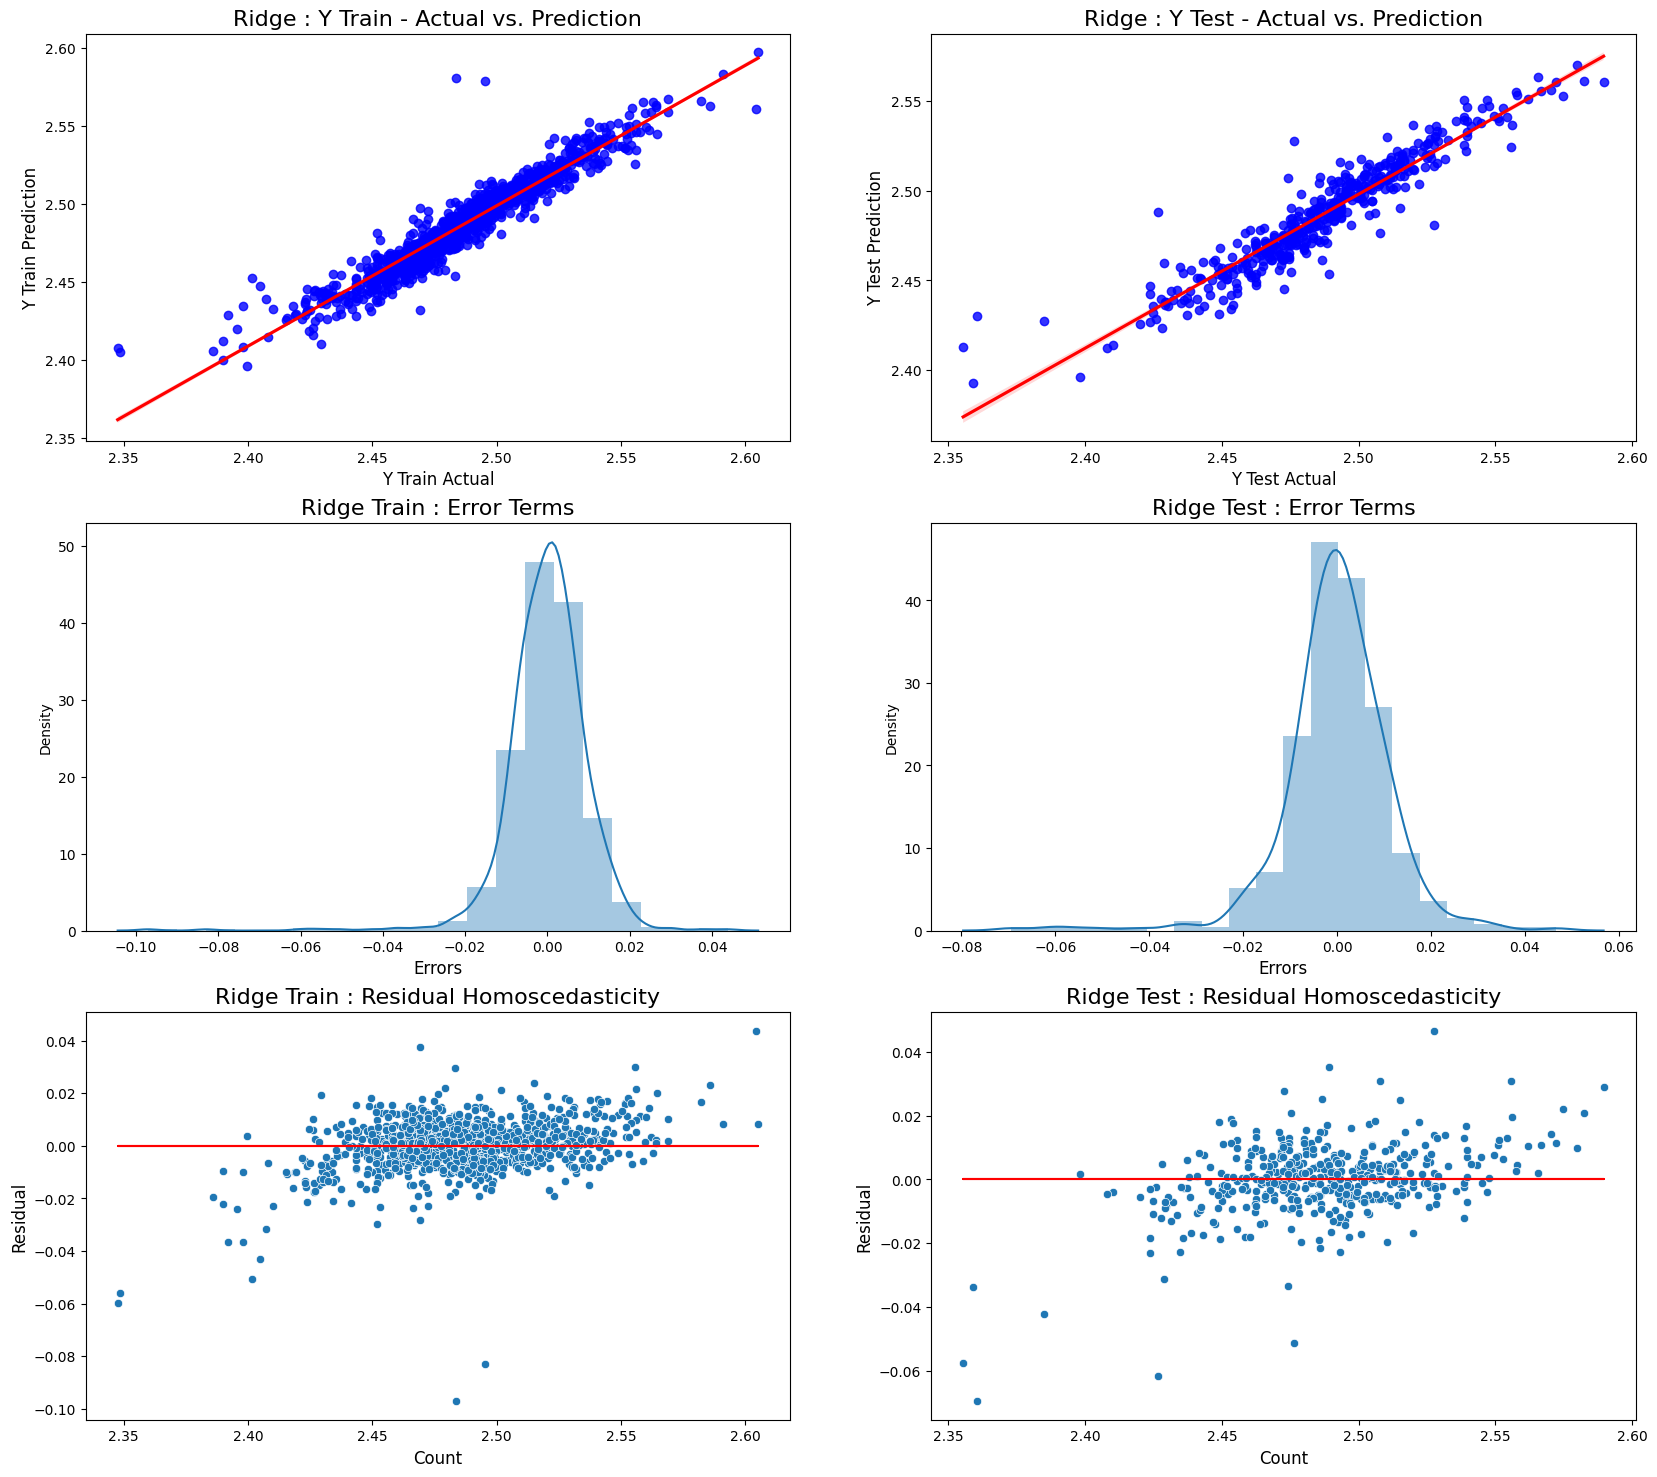

In [1092]:
# Ridge - y-Predicted vs. y-Actual Values plot
plt.subplots(figsize=(20,18))

plt.subplot(3,2,1)
sns.regplot(x=y_train, y=y_pred_train_rge, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Ridge : Y Train - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Train Actual', fontsize=12)
plt.ylabel('Y Train Prediction', fontsize=12)

plt.subplot(3,2,2)
sns.regplot(x=y_test, y=y_pred_test_rge, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Ridge : Y Test - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Test Actual', fontsize=12)
plt.ylabel('Y Test Prediction', fontsize=12)

plt.subplot(3,2,3)
sns.distplot((y_train - y_pred_train_rge), bins = 20)
plt.title('Ridge Train : Error Terms', fontsize = 16)                  # Plot heading
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,4)
sns.distplot((y_test - y_pred_test_rge), bins = 20)
plt.title('Ridge Test : Error Terms', fontsize = 16)                  # Plot heading 
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,5)
residual = y_train - y_pred_train_rge
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Ridge Train : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.subplot(3,2,6)
residual = y_test - y_pred_test_rge
sns.scatterplot(x=y_test,y=residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.title('Ridge Test : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)


plt.show()

Observation :
- R2 Squared Value for Train is 90%, the R2 Squared Value for Test (UnSeen Data) is 88%.
- The gap between the R2 Squares for Train and Test is reduced when compared to that for Linear Regression.
- Error plotted demonstrate a normal curve.
- Residual Homoscedasticity plot shows that the error is constant along the values of the dependent variable.

In [1093]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(model_cv.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054489,0.055096,0.006868,0.007266,0.0001,{'alpha': 0.0001},-0.009613,-0.008478,-0.009028,-0.007731,-0.007936,-0.008557,0.000694,1,-0.007278,-0.006854,-0.007101,-0.007455,-0.007543,-0.007247,0.000248
1,0.020759,0.009242,0.011857,0.006616,0.001,{'alpha': 0.001},-0.008689,-0.009373,-0.009613,-0.008551,-0.009387,-0.009123,0.000422,2,-0.008984,-0.008284,-0.008507,-0.009040,-0.009009,-0.008765,0.000310
2,0.020573,0.005712,0.003171,0.006342,0.01,{'alpha': 0.01},-0.016435,-0.016370,-0.015926,-0.014752,-0.017160,-0.016128,0.000794,3,-0.015837,-0.015651,-0.016001,-0.016031,-0.016127,-0.015929,0.000168
3,0.020535,0.006026,0.009716,0.006446,0.05,{'alpha': 0.05},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
4,0.018455,0.003259,0.003174,0.006348,0.1,{'alpha': 0.1},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
5,0.020119,0.005952,0.006266,0.007674,0.2,{'alpha': 0.2},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
6,0.018941,0.006163,0.004330,0.005949,0.3,{'alpha': 0.3},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
7,0.018421,0.008576,0.009696,0.007501,0.4,{'alpha': 0.4},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
8,0.020505,0.009620,0.013117,0.007472,0.5,{'alpha': 0.5},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
9,0.016930,0.002602,0.006249,0.007654,0.6,{'alpha': 0.6},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181


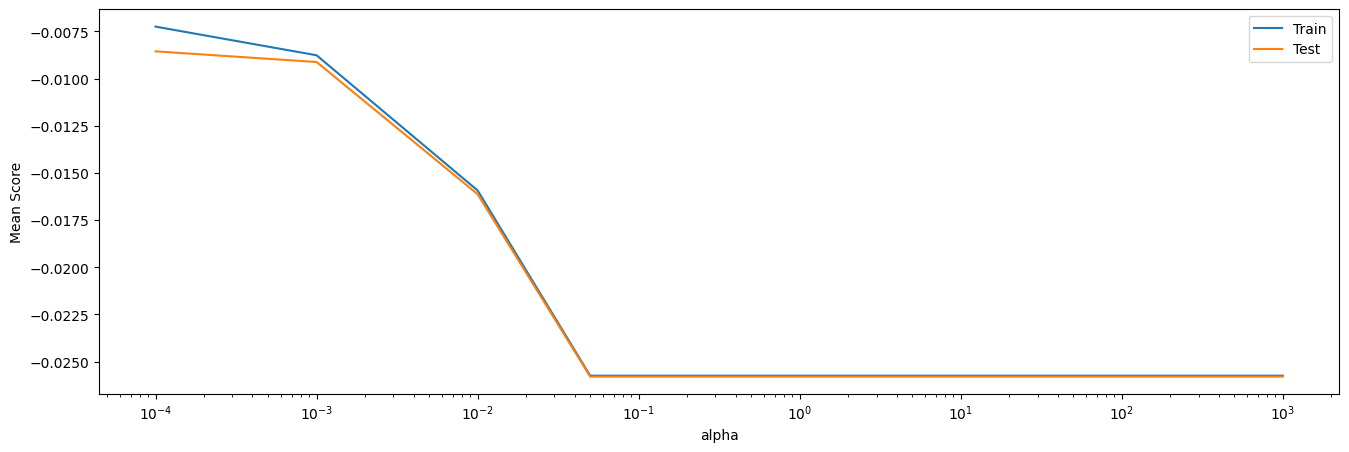

In [1094]:
## Plotting R2 score vs alpha values
plt.figure(figsize=(16,5))
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Mean Score')
plt.xscale('log')
plt.legend()
plt.show()

Observations 
- As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.
- Optimal Value of alpha is 20.

### Lasso Regression


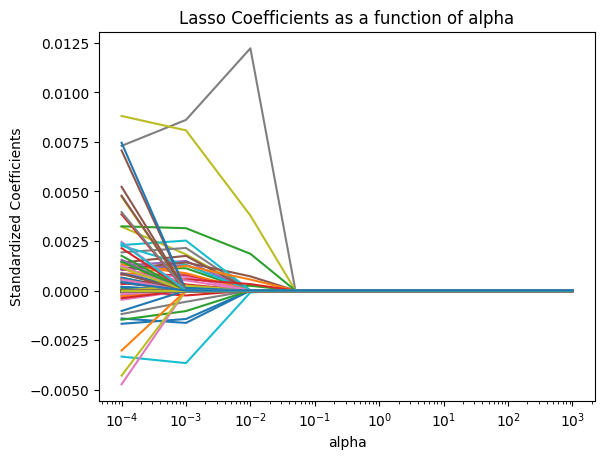

In [1095]:
## Creating a Lasso model
## Run a cross validation on a list of alphas to find the optimum value of alpha
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
coefs = []

for key, value in params.items():
    for a in value:
        lasso.set_params(alpha=a)
        lasso.fit(X_train, y_train)
        coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(value, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso Coefficients as a function of alpha');

Observation :
- As we move from left to right in the above plot, notice that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

In [1096]:
## Create a dataframe of Lasso cross validation results
lassoCV_results= pd.DataFrame(model_cv.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054489,0.055096,0.006868,0.007266,0.0001,{'alpha': 0.0001},-0.009613,-0.008478,-0.009028,-0.007731,-0.007936,-0.008557,0.000694,1,-0.007278,-0.006854,-0.007101,-0.007455,-0.007543,-0.007247,0.000248
1,0.020759,0.009242,0.011857,0.006616,0.001,{'alpha': 0.001},-0.008689,-0.009373,-0.009613,-0.008551,-0.009387,-0.009123,0.000422,2,-0.008984,-0.008284,-0.008507,-0.009040,-0.009009,-0.008765,0.000310
2,0.020573,0.005712,0.003171,0.006342,0.01,{'alpha': 0.01},-0.016435,-0.016370,-0.015926,-0.014752,-0.017160,-0.016128,0.000794,3,-0.015837,-0.015651,-0.016001,-0.016031,-0.016127,-0.015929,0.000168
3,0.020535,0.006026,0.009716,0.006446,0.05,{'alpha': 0.05},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
4,0.018455,0.003259,0.003174,0.006348,0.1,{'alpha': 0.1},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
5,0.020119,0.005952,0.006266,0.007674,0.2,{'alpha': 0.2},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
6,0.018941,0.006163,0.004330,0.005949,0.3,{'alpha': 0.3},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
7,0.018421,0.008576,0.009696,0.007501,0.4,{'alpha': 0.4},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
8,0.020505,0.009620,0.013117,0.007472,0.5,{'alpha': 0.5},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181
9,0.016930,0.002602,0.006249,0.007654,0.6,{'alpha': 0.6},-0.025956,-0.025868,-0.025528,-0.024555,-0.027081,-0.025798,0.000812,4,-0.025739,-0.025699,-0.025811,-0.026025,-0.025464,-0.025748,0.000181


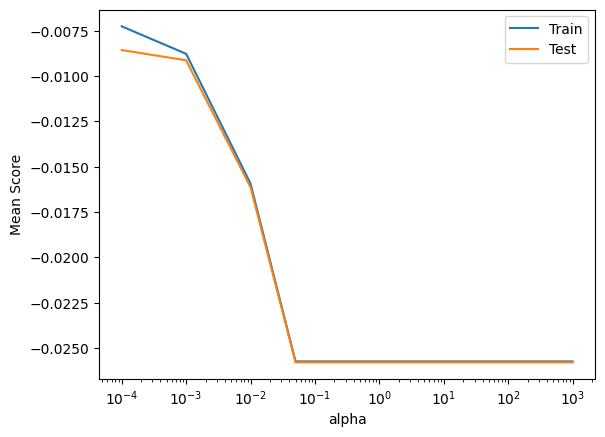

In [1097]:
## Plotting Mean Score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('Mean Score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in both train and test error.
- Error Value Flattens out after 0.0259, to the alpha value of 0.0001.

In [1098]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
y_pred_train_las = lasso.predict(X_train)
y_pred_test_las = lasso.predict(X_test)

In [1099]:
# Metrics Calculation
metric3 = []
r2_train_las = r2_score(y_train, y_pred_train_las)
print("Train - R2 Score : ", r2_train_las)
metric3.append(r2_train_las)

r2_test_las = r2_score(y_test, y_pred_test_las)
print("Test - R2 Score : ", r2_test_las)
metric3.append(r2_test_las)

rss1_las = np.sum(np.square(y_train - y_pred_train_las))
print("Train - Residual Sum of Squares : ", rss1_las)
metric3.append(rss1_las)

rss2_las = np.sum(np.square(y_test - y_pred_test_las))
print("Test - Residual Sum of Sqaures : ", rss2_las)
metric3.append(rss2_las)

mse_train_las = mean_squared_error(y_train, y_pred_train_las)
print("Train - Mean Squared Error : ", mse_train_las)
metric3.append(mse_train_las**0.5)

mse_test_las = mean_squared_error(y_test, y_pred_test_las)
print("Test - Mean Squared Error : ", mse_test_las)
metric3.append(mse_test_las**0.5)

Train - R2 Score :  0.9011059302896477
Test - R2 Score :  0.8854062512015786
Train - Residual Sum of Squares :  0.10954395219563931
Test - Residual Sum of Sqaures :  0.057504572967301354
Train - Mean Squared Error :  0.0001072908444619386
Test - Mean Squared Error :  0.00013098991564305547


#### Lasso - Model Visualization


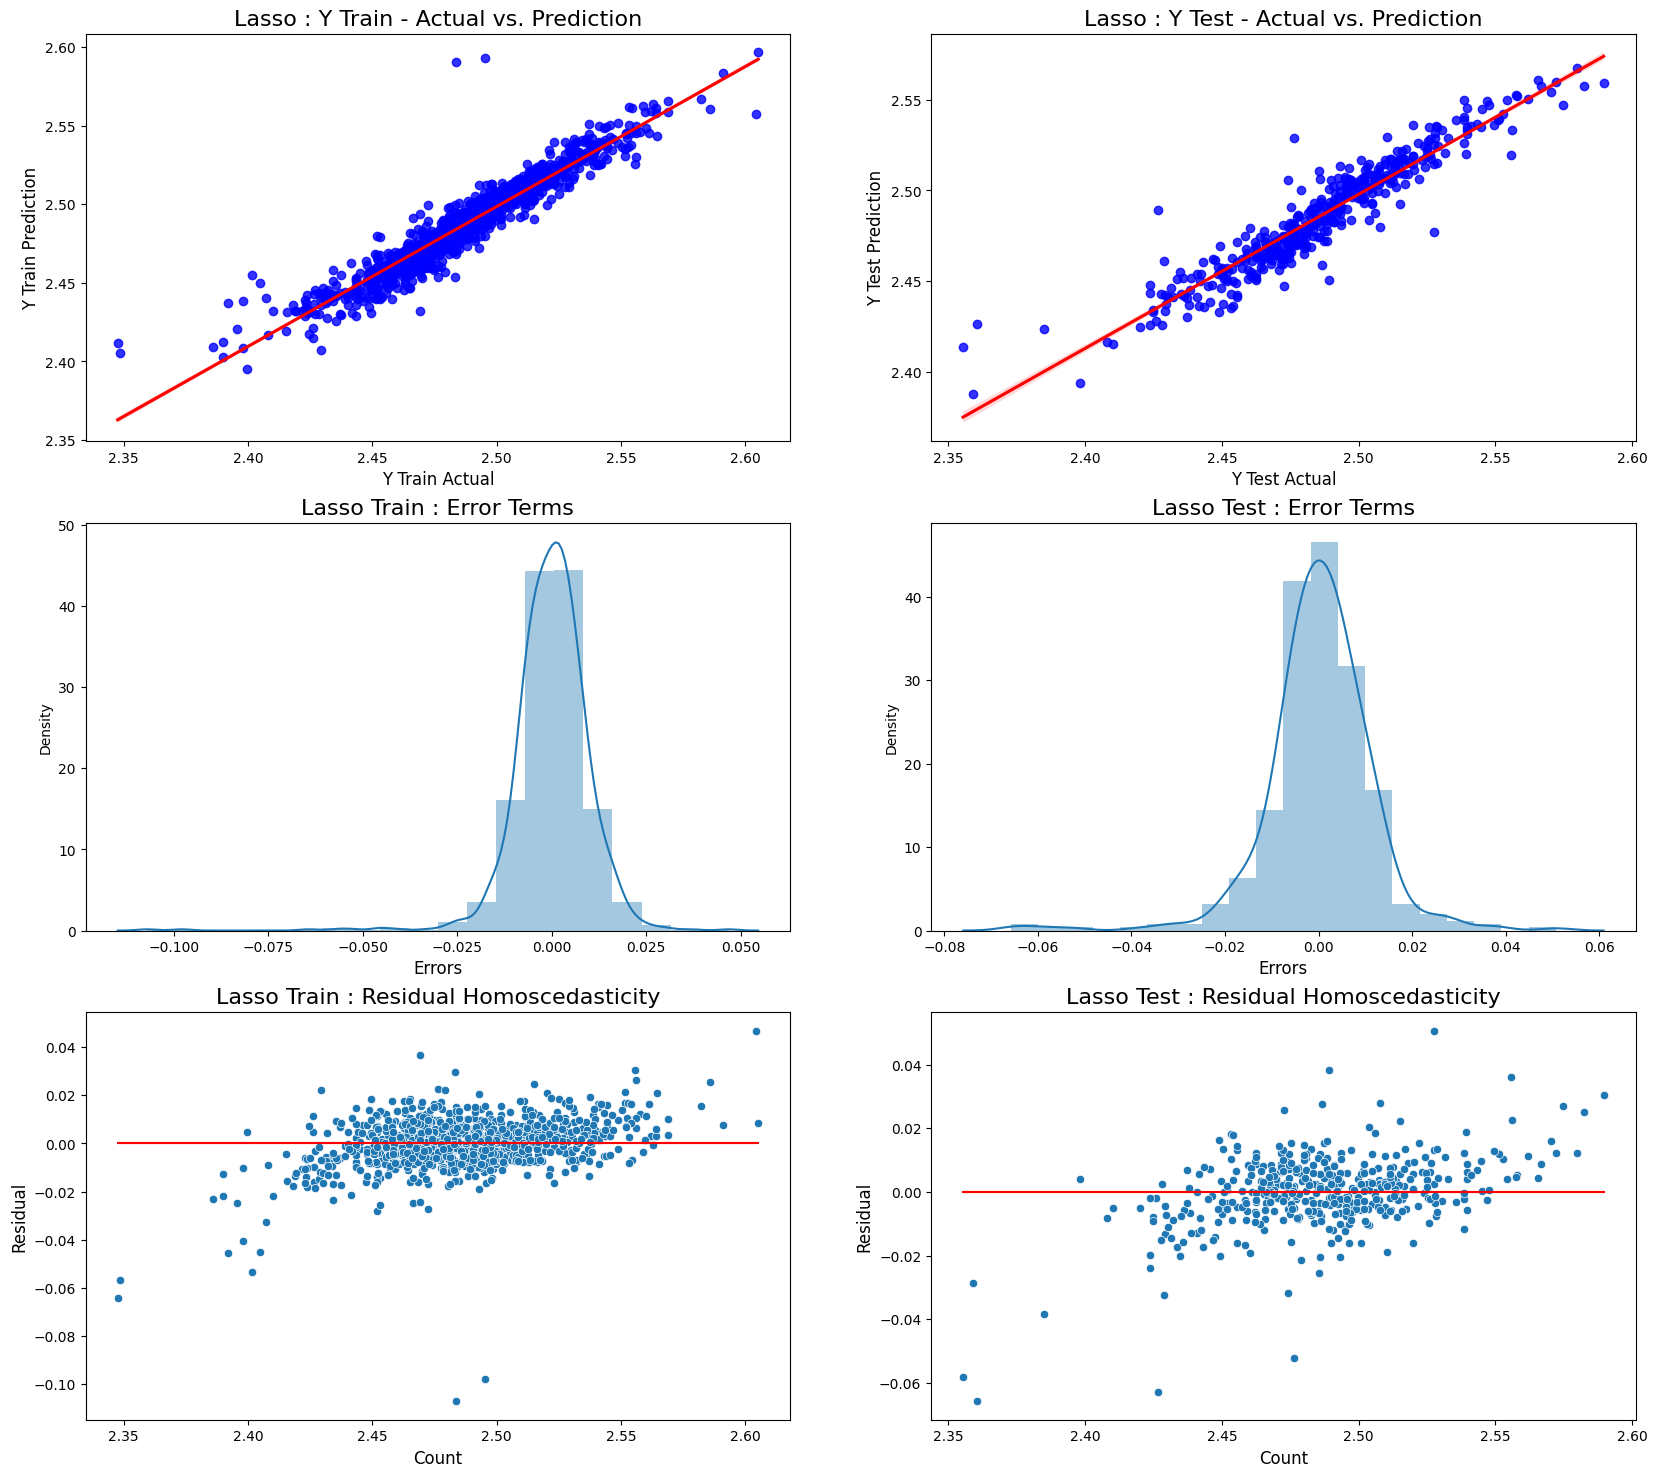

In [1100]:
plt.subplots(figsize=(20,18))

plt.subplot(3,2,1)
sns.regplot(x=y_train, y=y_pred_train_las, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Lasso : Y Train - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Train Actual', fontsize=12)
plt.ylabel('Y Train Prediction', fontsize=12)

plt.subplot(3,2,2)
sns.regplot(x=y_test, y=y_pred_test_las, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Lasso : Y Test - Actual vs. Prediction', fontsize=16)
plt.axis('tight')
plt.xlabel('Y Test Actual', fontsize=12)
plt.ylabel('Y Test Prediction', fontsize=12)

plt.subplot(3,2,3)
sns.distplot((y_train - y_pred_train_las), bins = 20)
plt.title('Lasso Train : Error Terms', fontsize = 16)                  # Plot heading
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,4)
sns.distplot((y_test - y_pred_test_las), bins = 20)
plt.title('Lasso Test : Error Terms', fontsize = 16)                  # Plot heading 
plt.axis('tight')
plt.xlabel('Errors', fontsize = 12)                         # X-label

plt.subplot(3,2,5)
residual = y_train - y_pred_train_las
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Lasso Train : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)

plt.subplot(3,2,6)
residual = y_test - y_pred_test_las
sns.scatterplot(x=y_test,y=residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.title('Lasso Test : Residual Homoscedasticity', fontsize = 16)                  # Plot heading 
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.show()

Observation :
- R2 Squared Value for Train is 88%, the R2 Squared Value for Test  is 87%.
- The gap between the R2 Squares for Train and Test is reduced when compared to that for Linear Regression.
- Error plotted demonstrate a normal curve.
- Residual Homoscedasticity plot shows that the error is constant along the values of the dependent variable.

In [1101]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.799958,0.910847,0.901106
1,R2 Score (Test),-3.697733,0.886783,0.885406
2,RSS (Train),0.221584,0.098754,0.109544
3,RSS (Test),2.357381,0.056814,0.057505
4,MSE (Train),0.014732,0.009835,0.010358
5,MSE (Test),0.073280,0.011376,0.011445


Observation 
- Based on the R2 score on Test data , Linear Regression suffering from overfitting
- Both Ridge and Lasso doing a pretty good job in addressing the overfit

### Comparing Model Coefficients

In [1102]:
coeff_summary = pd.DataFrame(index=X_train.columns)
coeff_summary.rows = X_train.columns
coeff_summary['Linear'] = lr.params
coeff_summary['Ridge'] = ridge.coef_
coeff_summary['Lasso'] = lasso.coef_
coeff_summary.head(318)

,Linear,Ridge,Lasso
MSSubClass,1.215579e-03,-0.002031,-0.001678
LotFrontage,1.928529e-03,-0.000491,-0.000195
LotArea,1.728166e-03,0.001154,0.001149
LotShape,5.709550e-05,-0.000046,-0.000045
Utilities,1.655356e-04,0.000503,0.000428
LandSlope,4.614896e-04,0.000506,0.000388
HouseStyle,-1.054579e-04,-0.000337,-0.000465
OverallQual,3.299529e-03,0.006685,0.007301
OverallCond,4.172035e-03,0.003319,0.003221
YearBuilt,-8.536275e-03,-0.002773,-0.003334


In [1103]:
## View the number of features removed by lasso
coeff_summary[coeff_summary['Lasso']==0].shape

(129, 3)

Observation 
- Notice that Lasso has removed / eliminated 149 features

In [1104]:
## View the top 10 coefficients of Ridge regression in descending order
coeff_summary['Ridge'].sort_values(ascending=False)[:10]

OverallQual             0.006685
Neighborhood_Crawfor    0.006490
GrLivArea               0.004919
Neighborhood_NridgHt    0.004900
Condition1_Norm         0.004419
Neighborhood_Somerst    0.004188
MSZoning_RL             0.004032
Neighborhood_ClearCr    0.003927
Exterior1st_BrkFace     0.003672
1stFlrSF                0.003653
Name: Ridge, dtype: float64

In [1105]:
## View the top 10 coefficients of Lasso in descending order
coeff_summary['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.008808
Neighborhood_Somerst    0.007458
OverallQual             0.007301
Neighborhood_Crawfor    0.007069
Neighborhood_NridgHt    0.005234
Condition1_Norm         0.004786
MSZoning_RL             0.004734
Exterior1st_BrkFace     0.003956
Neighborhood_ClearCr    0.003846
GarageCars              0.003241
Name: Lasso, dtype: float64

### Assignment - Case Study Part-1  - Observations from the analysis

#### Business Objectives
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

#### The variables influencing the Price of the House
- OverallQual : Houses with Rating 'Excellent' and 'Good' Rating for the  material and finish
- GrLivArea: Houses with higher Above grade (ground) living area square feet
- Neighborhood: House with Physical locations within Ames city limits of 'Somerset' and 'Crawford'
- Functional: Houses with 'Typical Functionality' Home functionality
- Condition1: Houses with 'Normal' Proximity to various conditions or more than one varius conditions.
- MSZoning: Identifies the general zoning classification of the sale.
- TotalBsmtSF: Houses with higher Total square feet of basement area
- OverallCond: Houses with Rating of 'Excellent' Rating for their overall condition
- SaleCondition: Condition of sale
- MSZoning : Houses in 'FV' Floating Village Residential zone.
#### Insight from Regularization
- Both lasso and ridge doign a good job in addressing the regularization


    

### Assignment - Case Study Part 2  - Subjective questions

###### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented

The Optimal value of alpha for Ridge and Lasso Regression:
- Ridge Regression - 20
- Lasso Regression - 0.0001

In [1106]:
# Lets check for the changes in the model if we choose double the value of alpha for both ridge and lasso
# Earlier Ridge Optimal Value was 20, double of it will be 40.
ridge = Ridge(alpha=40)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [1107]:
## Make predictions
y_train_pred_rge = ridge.predict(X_train)
y_test_pred_rge = ridge.predict(X_test)

In [1108]:
## Check metrics
# Calculate and Compare the  R2 score, RSS and RMSE
# Calculate and Compare the  R2 score, RSS and RMSE
# Metrics Calculation
metric2 = []
r2_train_rge = r2_score(y_train, y_pred_train_rge)
print("Train - R2 Score : ", r2_train_rge)
metric2.append(r2_train_rge)

r2_test_rge = r2_score(y_test, y_pred_test_rge)
print("Test - R2 Score : ", r2_test_rge)
metric2.append(r2_test_rge)

rss1_rge = np.sum(np.square(y_train - y_pred_train_rge))
print("Train - Residual Sum of Squares : ", rss1_rge)
metric2.append(rss1_rge)

rss2_rge = np.sum(np.square(y_test - y_pred_test_rge))
print("Test - Residual Sum of Sqaures : ", rss2_rge)
metric2.append(rss2_rge)

mse_train_rge = mean_squared_error(y_train, y_pred_train_rge)
print("Train - Mean Squared Error : ", mse_train_rge)
metric2.append(mse_train_rge**0.5)

mse_test_rge = mean_squared_error(y_test, y_pred_test_rge)
print("Test - Mean Squared Error : ", mse_test_rge)
metric2.append(mse_test_rge**0.5)

Train - R2 Score :  0.9108470444179138
Test - R2 Score :  0.8867827637046621
Train - Residual Sum of Squares :  0.09875381944526929
Test - Residual Sum of Sqaures :  0.05681382181809854
Train - Mean Squared Error :  9.672264392288863e-05
Test - Mean Squared Error :  0.0001294164506107028


In [1109]:
# Earlier Lasso Optimal Value was 0.0001, double of it will be 0.0002.
#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised

lasso = Lasso(alpha=0.0002)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [1110]:
## Make predictions
y_train_pred_las = lasso.predict(X_train)
y_test_pred_las = lasso.predict(X_test)

In [1111]:
# Metrics Calculation
metric3 = []
r2_train_las = r2_score(y_train, y_pred_train_las)
print("Train - R2 Score : ", r2_train_las)
metric3.append(r2_train_las)

r2_test_las = r2_score(y_test, y_pred_test_las)
print("Test - R2 Score : ", r2_test_las)
metric3.append(r2_test_las)

rss1_las = np.sum(np.square(y_train - y_pred_train_las))
print("Train - Residual Sum of Squares : ", rss1_las)
metric3.append(rss1_las)

rss2_las = np.sum(np.square(y_test - y_pred_test_las))
print("Test - Residual Sum of Sqaures : ", rss2_las)
metric3.append(rss2_las)

mse_train_las = mean_squared_error(y_train, y_pred_train_las)
print("Train - Mean Squared Error : ", mse_train_las)
metric3.append(mse_train_las**0.5)

mse_test_las = mean_squared_error(y_test, y_pred_test_las)
print("Test - Mean Squared Error : ", mse_test_las)
metric3.append(mse_test_las**0.5)

Train - R2 Score :  0.9011059302896477
Test - R2 Score :  0.8854062512015786
Train - Residual Sum of Squares :  0.10954395219563931
Test - Residual Sum of Sqaures :  0.057504572967301354
Train - Mean Squared Error :  0.0001072908444619386
Test - Mean Squared Error :  0.00013098991564305547


In [1112]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric2
        }

rg_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.910847,0.901106
1,R2 Score (Test),0.886783,0.885406
2,RSS (Train),0.098754,0.109544
3,RSS (Test),0.056814,0.057505
4,MSE (Train),0.009835,0.010358
5,MSE (Test),0.011376,0.011445


- The Metrics for both Ridge and Lasso almost the  same, when we double the optimal values.
- Lets Check whether there is any impact on the Coefficients, top 10 predictor features.

In [1113]:
model_coeff = pd.DataFrame(index=X_train.columns)
model_coeff.rows = X_train.columns
model_coeff['Ridge'] = ridge.coef_
model_coeff['Lasso'] = lasso.coef_
## View the number of features selected by lasso
model_coeff[model_coeff['Lasso']!=0].shape

(51, 2)

In [1114]:
## View the number of features removed by lasso
model_coeff[model_coeff['Lasso']==0].shape

(150, 2)

In [1115]:
## View the top 10 coefficients of Ridge regression in descending order
model_coeff['Ridge'].sort_values(ascending=False)[:10]

OverallQual             0.006620
GrLivArea               0.004601
Neighborhood_Crawfor    0.004497
Condition1_Norm         0.003715
1stFlrSF                0.003418
Neighborhood_NridgHt    0.003315
OverallCond             0.003257
Neighborhood_Somerst    0.003092
MSZoning_RL             0.002952
SaleCondition_Normal    0.002830
Name: Ridge, dtype: float64

In [1116]:
## View the top 10 coefficients of Lasso in descending order
model_coeff['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.008598
OverallQual             0.007838
Condition1_Norm         0.003747
Neighborhood_Somerst    0.003610
GarageCars              0.003348
Neighborhood_Crawfor    0.003120
OverallCond             0.003065
MSZoning_RL             0.002966
FireplaceQu             0.002588
BsmtFullBath            0.002106
Name: Lasso, dtype: float64

- Total of 161 Features have been eliminated after the optimal value was doubled, when compared to 224 features earlier.

#### With Alpha value doubled, the important predictor values are
 when the Alpha values doubled , there is a slight changes in the top features selected , but this is not much affecting the R2 score

##### Question : 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

###### Answer :
Prefer to select Lasso Regression.
We have noticed that both Ridge and Lasso Regression are performing well in terms of predicting the SalePrice.
However, Ridge regression does have one obvious disadvantage. It would include all the predictors in the final model. This may not affect the accuracy of the predictions but can make model interpretation challenging when the number of predictors is very large. 
The number of feature variables is very large (200+) and the data may have unrelated or noisy variables, we may not want to keep such variables in the model. Lasso regression helps us here by performing feature selection.


##### Question : 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [1117]:
# Lets drop the top 5 predictor variables from original model, where optimal value was 20 and 0.0001 for Ridge and Lasso, respectively, which are as follows:
#drop_pred = ['OverallQual','GrLivArea', 'GarageCars','OverallCond','FireplaceQu']
drop_pred = ['GrLivArea','Neighborhood_Somerst', 'OverallQual','Neighborhood_Crawfor','Neighborhood_NridgHt']

# Dropping the top 5 from X Train and X Test
X_train_drop = X_train.drop(drop_pred, axis=1)
X_test_drop = X_test.drop(drop_pred, axis=1)


In [1118]:
## Creating a Lasso model
## Run a cross validation on a list of alphas to find the optimum value of alpha
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_drop, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1119]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [1120]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised
lasso = Lasso(alpha=0.0001)        
lasso.fit(X_train_drop, y_train)

Lasso(alpha=0.0001)

In [1121]:
# Prediction
y_pred_train_las = lasso.predict(X_train_drop)
y_pred_test_las = lasso.predict(X_test_drop)

In [1122]:
# Metrics Calculation
metric3 = []
r2_train_las = r2_score(y_train, y_pred_train_las)
print("Train - R2 Score : ", r2_train_las)
metric3.append(r2_train_las)

r2_test_las = r2_score(y_test, y_pred_test_las)
print("Test - R2 Score : ", r2_test_las)
metric3.append(r2_test_las)

rss1_las = np.sum(np.square(y_train - y_pred_train_las))
print("Train - Residual Sum of Squares : ", rss1_las)
metric3.append(rss1_las)

rss2_las = np.sum(np.square(y_test - y_pred_test_las))
print("Test - Residual Sum of Sqaures : ", rss2_las)
metric3.append(rss2_las)

mse_train_las = mean_squared_error(y_train, y_pred_train_las)
print("Train - Mean Squared Error : ", mse_train_las)
metric3.append(mse_train_las**0.5)

mse_test_las = mean_squared_error(y_test, y_pred_test_las)
print("Test - Mean Squared Error : ", mse_test_las)
metric3.append(mse_test_las**0.5)

Train - R2 Score :  0.8873032377501904
Test - R2 Score :  0.8718448153842843
Train - Residual Sum of Squares :  0.12483305391975551
Test - Residual Sum of Sqaures :  0.06430987067048391
Train - Mean Squared Error :  0.0001222654788636195
Test - Mean Squared Error :  0.0001464917327345875


In [1123]:
model_co = pd.DataFrame(index=X_train_drop.columns)
model_co.rows = X_train_drop.columns

In [1124]:
model_co['Lasso'] = lasso.coef_

In [1125]:
## View the number of features selected by lasso
model_co[model_co['Lasso']!=0].shape

(77, 1)

In [1126]:
## View the number of features removed by lasso
model_co[model_co['Lasso']==0].shape

(119, 1)

In [1127]:
## View the top 10 coefficients of Lasso in descending order
model_co['Lasso'].sort_values(ascending=False)[:10]

1stFlrSF               0.009064
2ndFlrSF               0.008240
MSZoning_FV            0.006642
Condition1_Norm        0.005081
MSZoning_RL            0.004453
Exterior1st_BrkFace    0.004035
OverallCond            0.003915
GarageCars             0.003487
FireplaceQu            0.003417
Foundation_PConc       0.002461
Name: Lasso, dtype: float64

###### Answer :
- After removing the top 5 predictors / features, following colums are our top 10 predictors / features:
    - 1stFlrSF, 2ndFlrSF,OverallCond,GarageCars,FireplaceQu,Neighborhood_Somerst,BsmtQual,GarageType_Attchd,KitchenQual,MSZoning_RL                                                                  

##### Question : 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

For a model to be more generic and robust it needs to be simple and not complex. By simple it means minimum number of driving factors that can provide an impact on the decision. 
1. The model may not trace all the data points in the training data set however it has a higher chance of detecting the test data. 
2. There must be a good trade-off between bias and trade off 
3. The model should not be too simple else it will fall under high bias and high variance. Not able to perform both on training and test data set 
4. Regularization can help us to achieve a simpler model The robust model has a good accuracy value which satisfies a trade off between bias and variance. The complex model tends to have a good accuracy score however it tends to overfit the model and fail to predict the test data.

Bias quantifies how accurate the model is likely to be on future (test) data. Extremely simple models are likely to fail in predicting complex real-world phenomena. Simplicity has its own disadvantages.
Bias measures how accurately a model can describe the actual task at hand.
Variance measures how flexible the model is with respect to changes in the training data.
As complexity increases, bias reduces and variance increases, and we aim to find the optimal point where the total model error is the least.
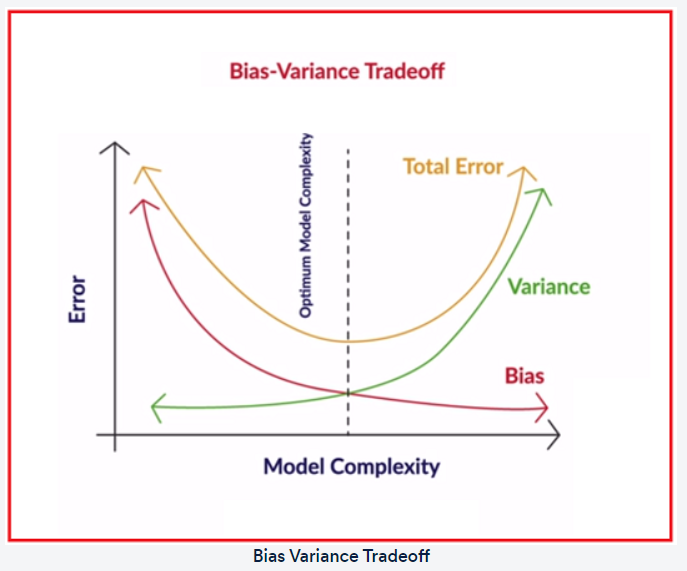